In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os
import pandas as pd
import glob

import blimpy
from blimpy import Waterfall
from blimpy import utils
from blimpy import plotting

import turbo_seti.find_doppler.seti_event as turbo
import turbo_seti.find_event as find_event
from turbo_seti.find_doppler.find_doppler import FindDoppler
from turbo_seti.find_event.find_event_pipeline import find_event_pipeline
from turbo_seti.find_event.plot_event_pipeline import plot_event_pipeline
import pandas as pd
%matplotlib inline

print("All packages imported!")

All packages imported!


In [7]:
from tensorflow.keras.utils import load_img
from tensorflow.keras.utils import img_to_array 
from keras.applications.vgg16 import preprocess_input 

# models 
from keras.applications.vgg16 import VGG16 
from keras.models import Model

# clustering and dimension reduction
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# for everything else
import os
import numpy as np
import matplotlib.pyplot as plt
from random import randint
import pandas as pd
import pickle


2023-07-03 10:33:22.187506: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


# Specific Source and Events Section

In [3]:
events_5 = pd.read_csv(f"/datax/scratch/calebp/seticore_testing/snr_testing/5off10on/all_events.csv")
events_8 = pd.read_csv(f"/datax/scratch/calebp/seticore_testing/snr_testing/8off10on/all_events.csv")
events_10 = pd.read_csv(f"/datax/scratch/calebp/seticore_testing/snr_testing/10off10on/all_events.csv")

In [4]:
events_8[events_8["Source"]=='AND_XXIII']

Unnamed: 0  TopHitNum  DriftRate         SNR         Freq  ChanIndx  \
90          66         67   0.806136   74.954597  1697.607346     52456   
91         176         61   0.846953   31.131990  1697.607961     52236   
92          67         68   0.775523  164.136581  1697.604409     53507   
93         177         62   0.785728  146.669632  1697.605013     53291   
94          68         69   1.428596   52.769363  1697.601311     54616   
95         178         63   0.061226   50.741020  1697.602062     54347   

      FreqStart      FreqEnd  CoarseChanNum  FullNumHitsInRange  ...     DEC  \
90  1697.607346  1697.607346             61                   1  ...  38.719   
91  1697.607961  1697.607961             61                   1  ...  38.783   
92  1697.604409  1697.604409             61                   1  ...  38.719   
93  1697.605013  1697.605013             61                   1  ...  38.783   
94  1697.601311  1697.601311             61                   1  ...  38.719   
95  1697.602062  1697.602062             61                   1  ...  38.783   

       DELTAT    DELTAF  max_drift_rate  obs_length        Hit_ID      status  \
90  18.253611 -2.793968             4.0  292.057776  AND_XXIII_66  on_table_1   
91  18.253611 -2.793968             4.0  292.057776  AND_XXIII_66  on_table_2   
92  18.253611 -2.793968             4.0  292.057776  AND_XXIII_67  on_table_1   
93  18.253611 -2.793968             4.0  292.057776  AND_XXIII_67  on_table_2   
94  18.253611 -2.793968             4.0  292.057776  AND_XXIII_68  on_table_1   
95  18.253611 -2.793968             4.0  292.057776  AND_XXIII_68  on_table_2   

    in_n_ons  RFI_in_range delta_t  
90       2.0             0     0.0  
91       NaN             0   642.0  
92       2.0             0     0.0  
93       NaN             0   642.0  
94       2.0             0     0.0  
95       NaN             0   642.0  

[6 rows x 24 columns]

In [5]:
events_5[events_5["Source"]=='MESSIER60']

Unnamed: 0  TopHitNum  DriftRate        SNR         Freq  ChanIndx  \
12          623        624  -0.489804  20.561760  1603.864127     50029   
13         4551        927  -0.448987  21.075634  1603.863814     50141   
14         8093       1043  -0.326536  25.131567  1603.863554     50234   
15          699        700  -0.561234  28.589607  1603.475042    189288   
16         4625       1001  -0.448987  32.731743  1603.474715    189405   
17         8167       1117  -0.346945  38.149277  1603.474458    189497   
166         623        624  -0.489804  20.561760  1603.864127     50029   
167        4551        927  -0.448987  21.075634  1603.863814     50141   
168        8093       1043  -0.326536  25.131567  1603.863554     50234   
169         699        700  -0.561234  28.589607  1603.475042    189288   
170        4625       1001  -0.448987  32.731743  1603.474715    189405   
171        8167       1117  -0.346945  38.149277  1603.474458    189497   

       FreqStart      FreqEnd  CoarseChanNum  FullNumHitsInRange  ...  \
12   1603.864127  1603.864127             29                   1  ...   
13   1603.863814  1603.863814             29                   1  ...   
14   1603.863554  1603.863554             29                   1  ...   
15   1603.475042  1603.475042             29                   1  ...   
16   1603.474715  1603.474715             29                   1  ...   
17   1603.474458  1603.474458             29                   1  ...   
166  1603.864127  1603.864127             29                   1  ...   
167  1603.863814  1603.863814             29                   1  ...   
168  1603.863554  1603.863554             29                   1  ...   
169  1603.475042  1603.475042             29                   1  ...   
170  1603.474715  1603.474715             29                   1  ...   
171  1603.474458  1603.474458             29                   1  ...   

           DEC     DELTAT    DELTAF  max_drift_rate  obs_length  \
12   11.552722  18.253611 -2.793968             4.0  292.057776   
13   11.552727  18.253611 -2.793968             4.0  292.057776   
14   11.552718  18.253611 -2.793968             4.0  292.057776   
15   11.552722  18.253611 -2.793968             4.0  292.057776   
16   11.552727  18.253611 -2.793968             4.0  292.057776   
17   11.552718  18.253611 -2.793968             4.0  292.057776   
166  11.552722  18.253611 -2.793968             4.0  292.057776   
167  11.552727  18.253611 -2.793968             4.0  292.057776   
168  11.552718  18.253611 -2.793968             4.0  292.057776   
169  11.552722  18.253611 -2.793968             4.0  292.057776   
170  11.552727  18.253611 -2.793968             4.0  292.057776   
171  11.552718  18.253611 -2.793968             4.0  292.057776   

            Hit_ID      status  in_n_ons  RFI_in_range delta_t  
12   MESSIER60_623  on_table_1       2.0             0     0.0  
13   MESSIER60_623  on_table_2       NaN             0   636.0  
14   MESSIER60_623  on_table_3       NaN             0  1276.0  
15   MESSIER60_699  on_table_1       2.0             0     0.0  
16   MESSIER60_699  on_table_2       NaN             0   636.0  
17   MESSIER60_699  on_table_3       NaN             0  1276.0  
166  MESSIER60_623  on_table_1       2.0             0     0.0  
167  MESSIER60_623  on_table_2       NaN             0   636.0  
168  MESSIER60_623  on_table_3       NaN             0  1276.0  
169  MESSIER60_699  on_table_1       2.0             0     0.0  
170  MESSIER60_699  on_table_2       NaN             0   636.0  
171  MESSIER60_699  on_table_3       NaN             0  1276.0  

[12 rows x 24 columns]

In [6]:
events_10[~events_10["TopHitNum"].isin(events_8["TopHitNum"])]


Unnamed: 0  TopHitNum  DriftRate        SNR         Freq  ChanIndx  \
3           622        623  -0.683685  16.616074  1576.162023    527814   
9           347        348  -0.459192  10.275838  1227.747409    449718   
10         3464        264  -0.500009  10.866648  1227.747093    449831   
13         3473        273  -0.530621  10.345715  1227.645708    486118   
14         6258        305  -0.530621  10.043272  1227.645379    486236   
..          ...        ...        ...        ...          ...       ...   
444        2418        197  -0.244902  84.709412  1600.543248    190042   
445        4721        194  -0.173472  78.919952  1600.543105    190093   
446         312        313  -0.346945  28.593786  1600.018345    377912   
447        2512        291  -0.244902  53.325989  1600.018149    377982   
448        4823        296  -0.173472  48.707855  1600.018007    378033   

       FreqStart      FreqEnd  CoarseChanNum  FullNumHitsInRange  ...  \
3    1576.162023  1576.162023             38                   1  ...   
9    1227.747409  1227.747409             29                   1  ...   
10   1227.747093  1227.747093             29                   1  ...   
13   1227.645708  1227.645708             29                   1  ...   
14   1227.645379  1227.645379             29                   1  ...   
..           ...          ...            ...                 ...  ...   
444  1600.543248  1600.543248             30                   1  ...   
445  1600.543105  1600.543105             30                   1  ...   
446  1600.018345  1600.018345             30                   1  ...   
447  1600.018149  1600.018149             30                   1  ...   
448  1600.018007  1600.018007             30                   1  ...   

         DEC     DELTAT    DELTAF  max_drift_rate  obs_length       Hit_ID  \
3    33.4189  18.253611 -2.793968             4.0  292.057776   AND_II_622   
9    33.4192  18.253611 -2.793968             4.0  292.057776   AND_II_347   
10   33.4215  18.253611 -2.793968             4.0  292.057776   AND_II_347   
13   33.4215  18.253611 -2.793968             4.0  292.057776   AND_II_355   
14   33.4248  18.253611 -2.793968             4.0  292.057776   AND_II_355   
..       ...        ...       ...             ...         ...          ...   
444  65.6125  18.253611 -2.793968             4.0  292.057776  NGC2403_210   
445  65.6428  18.253611 -2.793968             4.0  292.057776  NGC2403_210   
446  65.6025  18.253611 -2.793968             4.0  292.057776  NGC2403_312   
447  65.6125  18.253611 -2.793968             4.0  292.057776  NGC2403_312   
448  65.6428  18.253611 -2.793968             4.0  292.057776  NGC2403_312   

         status  in_n_ons  RFI_in_range delta_t  
3    on_table_1       2.0             0     0.0  
9    on_table_1       2.0             0     0.0  
10   on_table_2       NaN             0   632.0  
13   on_table_2       NaN             0   632.0  
14   on_table_3       NaN             0  1282.0  
..          ...       ...           ...     ...  
444  on_table_2       NaN             0   640.0  
445  on_table_3       NaN             0  1280.0  
446  on_table_1       2.0             0     0.0  
447  on_table_2       NaN             0   640.0  
448  on_table_3       NaN             0  1280.0  

[122 rows x 24 columns]

In [7]:
len(events_10)

449

In [8]:
len(events_5)

214

In [2]:
def grab_file_path(data_dir,file_type,node_number):
    '''
    returns h5 and dat file path from given directory, ordered correctly
    '''
    
    ## h5 list
    data_list = []
    for dirname, _, filenames in os.walk(data_dir):
        for filename in filenames:
            if filename[-len(file_type):] == file_type and node_number in filename:
                data_list.append(filename)
    
    data_list = sorted(data_list, key=lambda x: (x,x.split('_')[5]))

    print(data_list)
    
    data_path = os.path.join(data_dir, file_type[1:]+'_list.lst')
    with open(data_path, 'w') as f:
        for path in data_list:
            f.write(data_dir+path + '\n')

    #You don't have to print, but it's a good way to check that your list is in the correct order:
    with open(data_path, 'r') as f:
        print(f.read())
    f.close()
    
    return data_path

In [3]:
source = "AND_XXIII"
data_dir = f'/datax/scratch/calebp/seticore_testing/snr_testing/8off10on/{source}/'


['blc02_guppi_59404_21457_And_XXIII_0088.rawspec.0000.h5', 'blc02_guppi_59404_21778_HIP6533_0089.rawspec.0000.h5', 'blc02_guppi_59404_22099_And_XXIII_0090.rawspec.0000.h5', 'blc02_guppi_59404_22417_HIP6575_0091.rawspec.0000.h5', 'blc02_guppi_59404_22735_And_XXIII_0092.rawspec.0000.h5', 'blc02_guppi_59404_23051_HIP6782_0093.rawspec.0000.h5']
/datax/scratch/calebp/seticore_testing/snr_testing/8off10on/AND_XXIII/blc02_guppi_59404_21457_And_XXIII_0088.rawspec.0000.h5
/datax/scratch/calebp/seticore_testing/snr_testing/8off10on/AND_XXIII/blc02_guppi_59404_21778_HIP6533_0089.rawspec.0000.h5
/datax/scratch/calebp/seticore_testing/snr_testing/8off10on/AND_XXIII/blc02_guppi_59404_22099_And_XXIII_0090.rawspec.0000.h5
/datax/scratch/calebp/seticore_testing/snr_testing/8off10on/AND_XXIII/blc02_guppi_59404_22417_HIP6575_0091.rawspec.0000.h5
/datax/scratch/calebp/seticore_testing/snr_testing/8off10on/AND_XXIII/blc02_guppi_59404_22735_And_XXIII_0092.rawspec.0000.h5
/datax/scratch/calebp/seticore_testi

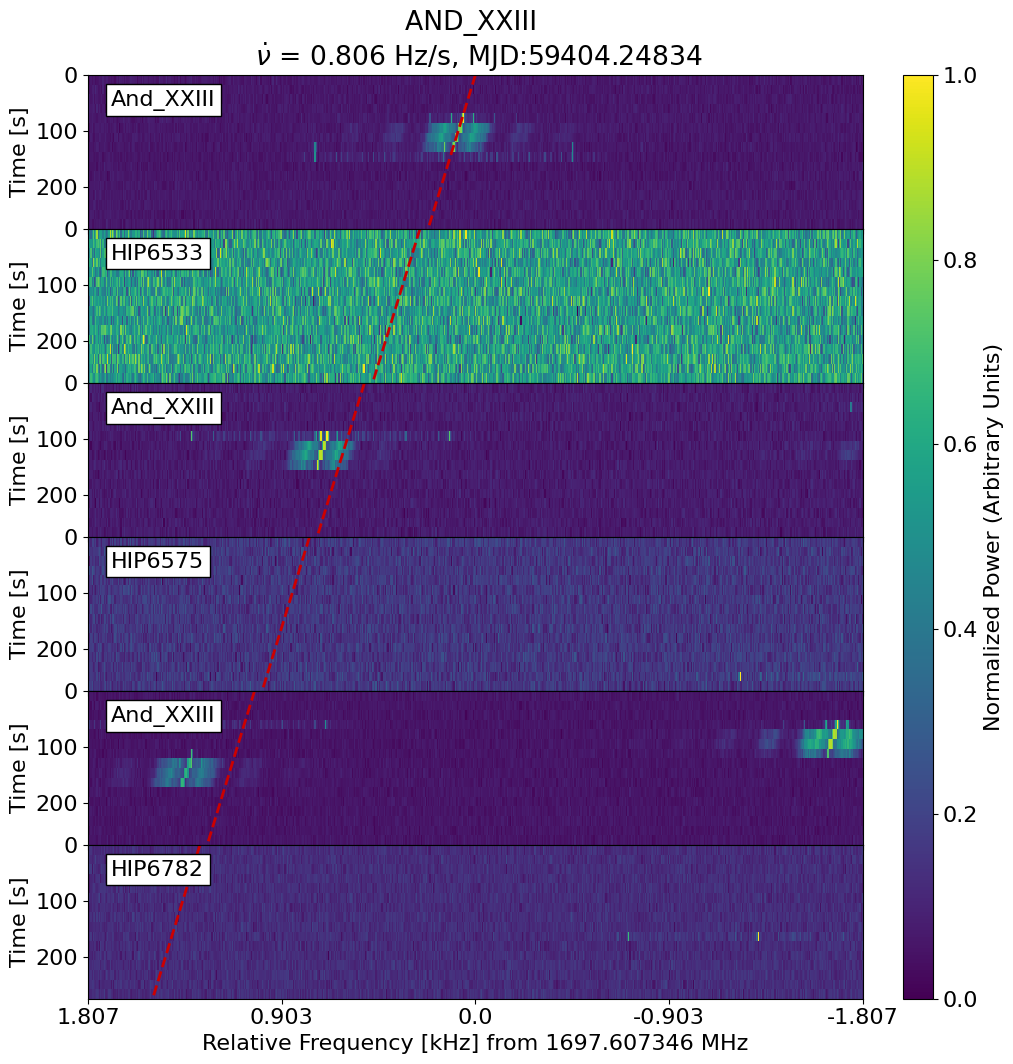

plot_event      INFO     plot_candidate_events: elapsed time = 9.46 seconds
['blc02_guppi_59404_21457_And_XXIII_0088.rawspec.0000.h5', 'blc02_guppi_59404_21778_HIP6533_0089.rawspec.0000.h5', 'blc02_guppi_59404_22099_And_XXIII_0090.rawspec.0000.h5', 'blc02_guppi_59404_22417_HIP6575_0091.rawspec.0000.h5', 'blc02_guppi_59404_22735_And_XXIII_0092.rawspec.0000.h5', 'blc02_guppi_59404_23051_HIP6782_0093.rawspec.0000.h5']
/datax/scratch/calebp/seticore_testing/snr_testing/8off10on/AND_XXIII/blc02_guppi_59404_21457_And_XXIII_0088.rawspec.0000.h5
/datax/scratch/calebp/seticore_testing/snr_testing/8off10on/AND_XXIII/blc02_guppi_59404_21778_HIP6533_0089.rawspec.0000.h5
/datax/scratch/calebp/seticore_testing/snr_testing/8off10on/AND_XXIII/blc02_guppi_59404_22099_And_XXIII_0090.rawspec.0000.h5
/datax/scratch/calebp/seticore_testing/snr_testing/8off10on/AND_XXIII/blc02_guppi_59404_22417_HIP6575_0091.rawspec.0000.h5
/datax/scratch/calebp/seticore_testing/snr_testing/8off10on/AND_XXIII/blc02_guppi_594

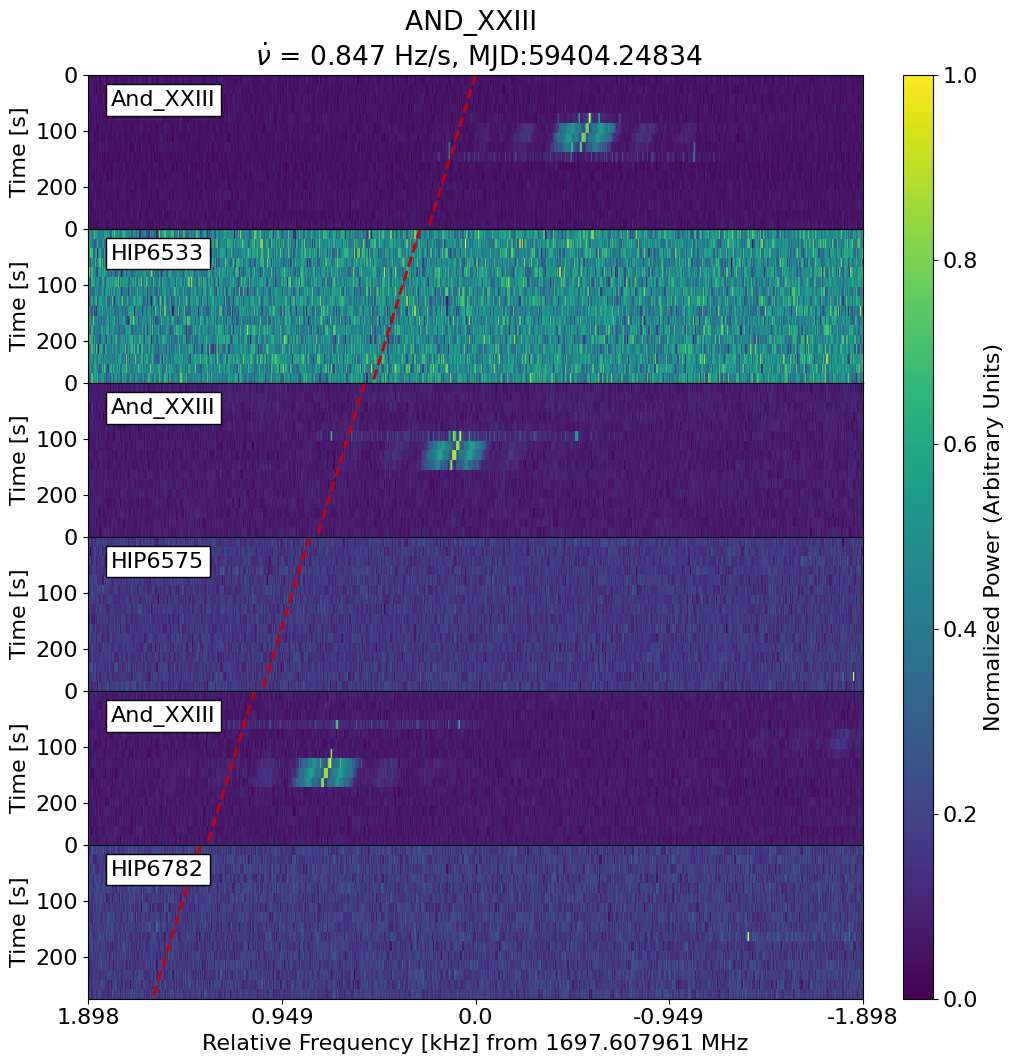

plot_event      INFO     plot_candidate_events: elapsed time = 9.37 seconds
['blc02_guppi_59404_21457_And_XXIII_0088.rawspec.0000.h5', 'blc02_guppi_59404_21778_HIP6533_0089.rawspec.0000.h5', 'blc02_guppi_59404_22099_And_XXIII_0090.rawspec.0000.h5', 'blc02_guppi_59404_22417_HIP6575_0091.rawspec.0000.h5', 'blc02_guppi_59404_22735_And_XXIII_0092.rawspec.0000.h5', 'blc02_guppi_59404_23051_HIP6782_0093.rawspec.0000.h5']
/datax/scratch/calebp/seticore_testing/snr_testing/8off10on/AND_XXIII/blc02_guppi_59404_21457_And_XXIII_0088.rawspec.0000.h5
/datax/scratch/calebp/seticore_testing/snr_testing/8off10on/AND_XXIII/blc02_guppi_59404_21778_HIP6533_0089.rawspec.0000.h5
/datax/scratch/calebp/seticore_testing/snr_testing/8off10on/AND_XXIII/blc02_guppi_59404_22099_And_XXIII_0090.rawspec.0000.h5
/datax/scratch/calebp/seticore_testing/snr_testing/8off10on/AND_XXIII/blc02_guppi_59404_22417_HIP6575_0091.rawspec.0000.h5
/datax/scratch/calebp/seticore_testing/snr_testing/8off10on/AND_XXIII/blc02_guppi_594

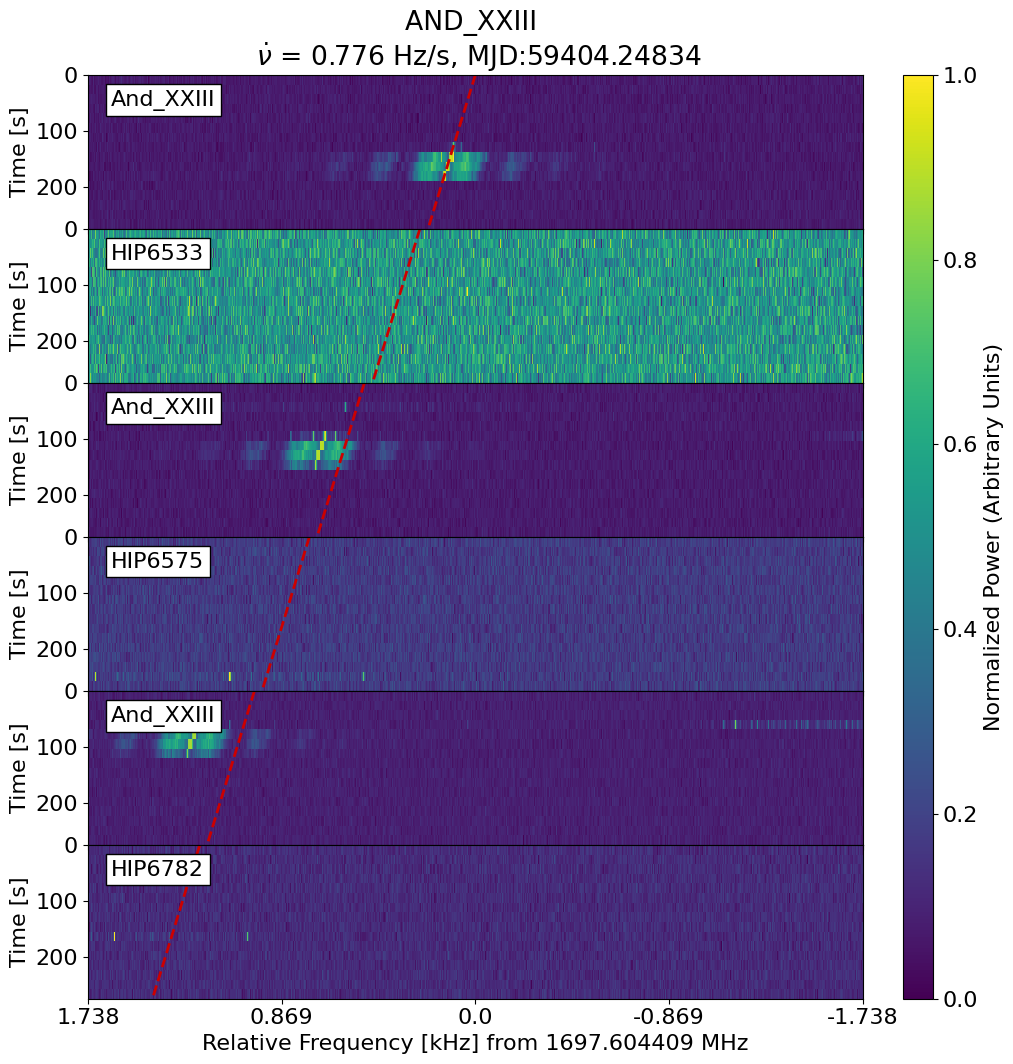

plot_event      INFO     plot_candidate_events: elapsed time = 9.26 seconds
['blc02_guppi_59404_21457_And_XXIII_0088.rawspec.0000.h5', 'blc02_guppi_59404_21778_HIP6533_0089.rawspec.0000.h5', 'blc02_guppi_59404_22099_And_XXIII_0090.rawspec.0000.h5', 'blc02_guppi_59404_22417_HIP6575_0091.rawspec.0000.h5', 'blc02_guppi_59404_22735_And_XXIII_0092.rawspec.0000.h5', 'blc02_guppi_59404_23051_HIP6782_0093.rawspec.0000.h5']
/datax/scratch/calebp/seticore_testing/snr_testing/8off10on/AND_XXIII/blc02_guppi_59404_21457_And_XXIII_0088.rawspec.0000.h5
/datax/scratch/calebp/seticore_testing/snr_testing/8off10on/AND_XXIII/blc02_guppi_59404_21778_HIP6533_0089.rawspec.0000.h5
/datax/scratch/calebp/seticore_testing/snr_testing/8off10on/AND_XXIII/blc02_guppi_59404_22099_And_XXIII_0090.rawspec.0000.h5
/datax/scratch/calebp/seticore_testing/snr_testing/8off10on/AND_XXIII/blc02_guppi_59404_22417_HIP6575_0091.rawspec.0000.h5
/datax/scratch/calebp/seticore_testing/snr_testing/8off10on/AND_XXIII/blc02_guppi_594

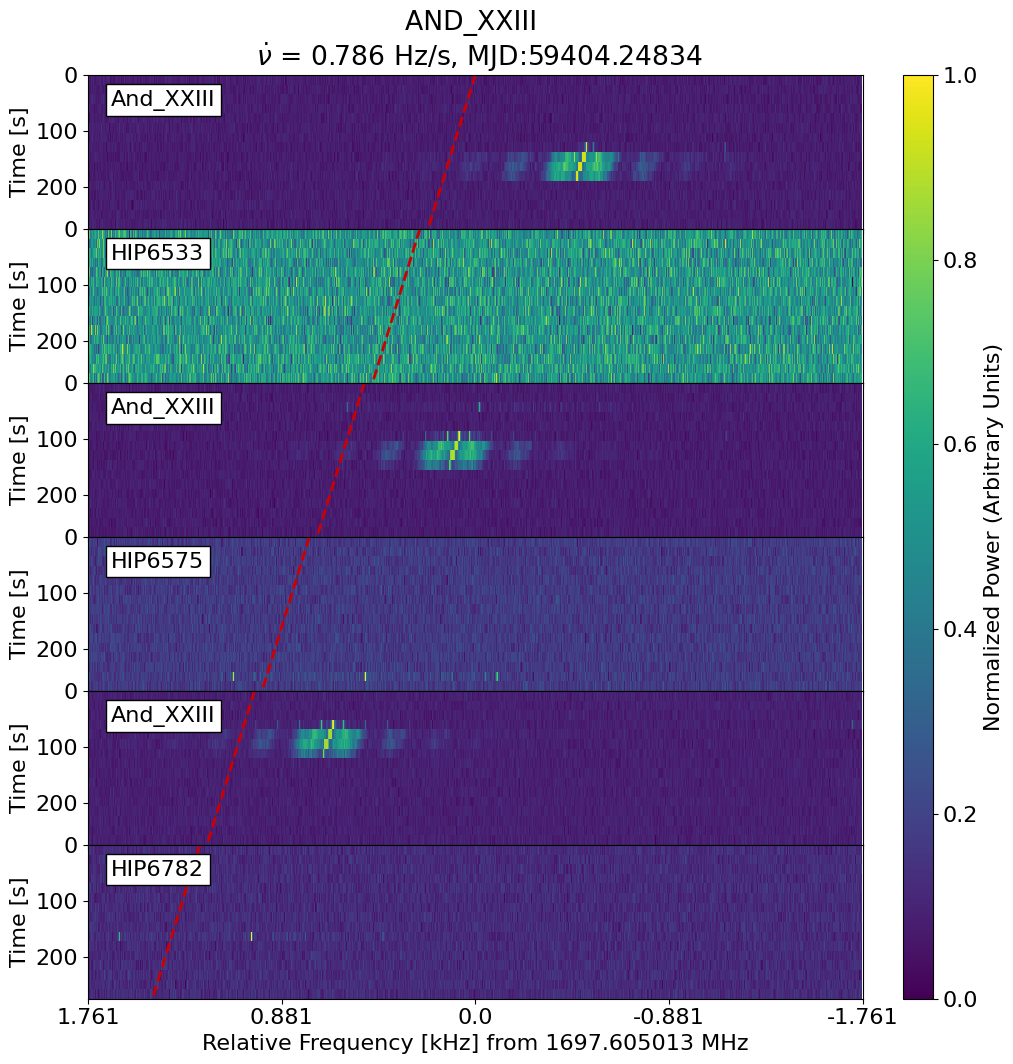

plot_event      INFO     plot_candidate_events: elapsed time = 9.33 seconds
['blc02_guppi_59404_21457_And_XXIII_0088.rawspec.0000.h5', 'blc02_guppi_59404_21778_HIP6533_0089.rawspec.0000.h5', 'blc02_guppi_59404_22099_And_XXIII_0090.rawspec.0000.h5', 'blc02_guppi_59404_22417_HIP6575_0091.rawspec.0000.h5', 'blc02_guppi_59404_22735_And_XXIII_0092.rawspec.0000.h5', 'blc02_guppi_59404_23051_HIP6782_0093.rawspec.0000.h5']
/datax/scratch/calebp/seticore_testing/snr_testing/8off10on/AND_XXIII/blc02_guppi_59404_21457_And_XXIII_0088.rawspec.0000.h5
/datax/scratch/calebp/seticore_testing/snr_testing/8off10on/AND_XXIII/blc02_guppi_59404_21778_HIP6533_0089.rawspec.0000.h5
/datax/scratch/calebp/seticore_testing/snr_testing/8off10on/AND_XXIII/blc02_guppi_59404_22099_And_XXIII_0090.rawspec.0000.h5
/datax/scratch/calebp/seticore_testing/snr_testing/8off10on/AND_XXIII/blc02_guppi_59404_22417_HIP6575_0091.rawspec.0000.h5
/datax/scratch/calebp/seticore_testing/snr_testing/8off10on/AND_XXIII/blc02_guppi_594

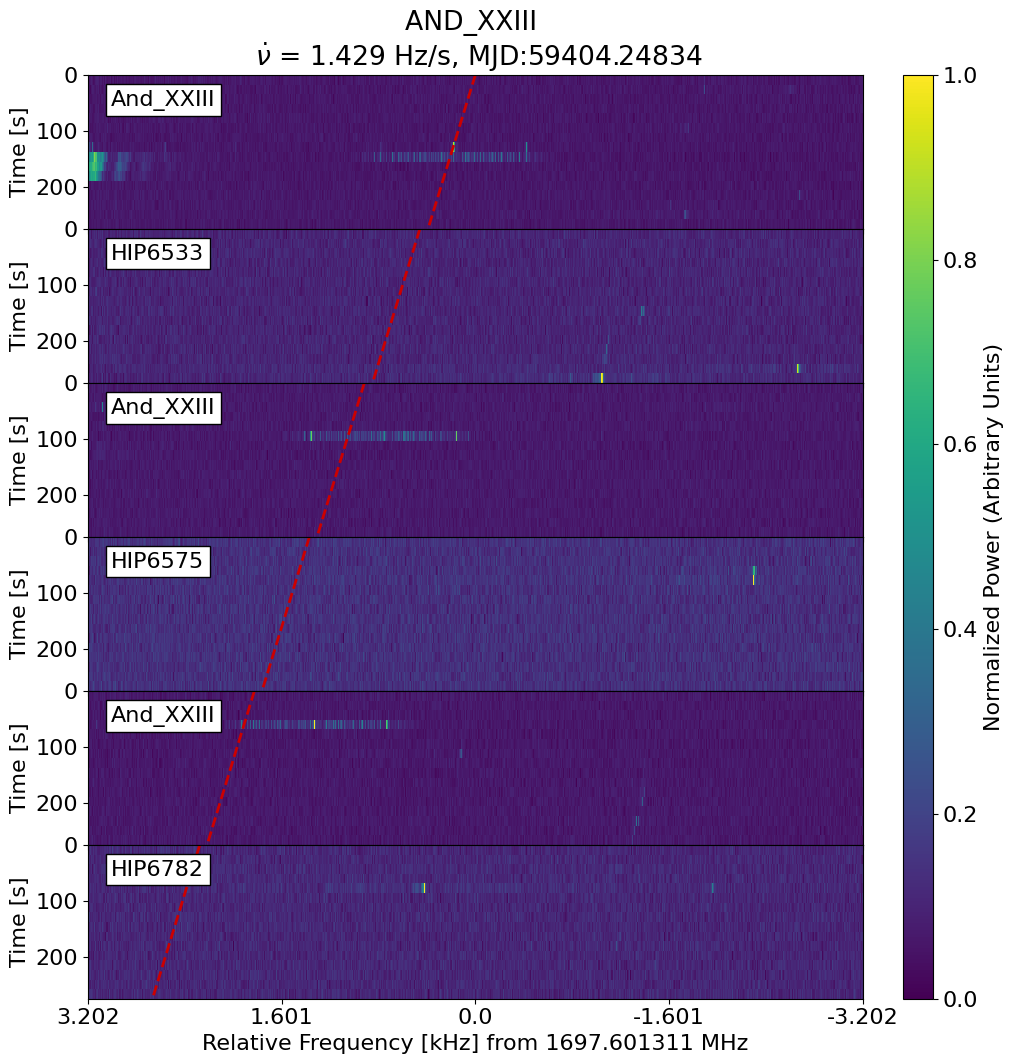

plot_event      INFO     plot_candidate_events: elapsed time = 9.32 seconds


In [4]:
source = "AND_XXIII"
data_dir = f'/datax/scratch/calebp/seticore_testing/snr_testing/8off10on/{source}/'
full_csv = pd.read_csv(data_dir+'master.csv')
for i in range(1,len(full_csv)):
    temp_csv = full_csv[i-1:i]
    temp_csv.to_csv(data_dir+'temp.csv')
    node = temp_csv["FileID"].values[0][:5]
    
    h5_list_path = grab_file_path(data_dir, '.h5',node)
    csv_file = glob.glob(data_dir+'*p.csv')
    
    plot_event_pipeline(csv_file[0], # full path of the CSV file built by find_event_pipeline()',
                h5_list_path, # full path of text file containing the list of .h5 files
                filter_spec='f{}'.format(3), # filter threshold
                user_validation=False,
                plot_dir = data_dir+"plots/") # Non-interactive

In [6]:
interesting = ['blc02_guppi_59404_21457_And_XXIII_0088.rawspec.0000.h5', 'blc02_guppi_59404_21778_HIP6533_0089.rawspec.0000.h5', 'blc02_guppi_59404_22099_And_XXIII_0090.rawspec.0000.h5', 'blc02_guppi_59404_22417_HIP6575_0091.rawspec.0000.h5', 'blc02_guppi_59404_22735_And_XXIII_0092.rawspec.0000.h5', 'blc02_guppi_59404_23051_HIP6782_0093.rawspec.0000.h5']
interesting2 = [data_dir + i for i in interesting]

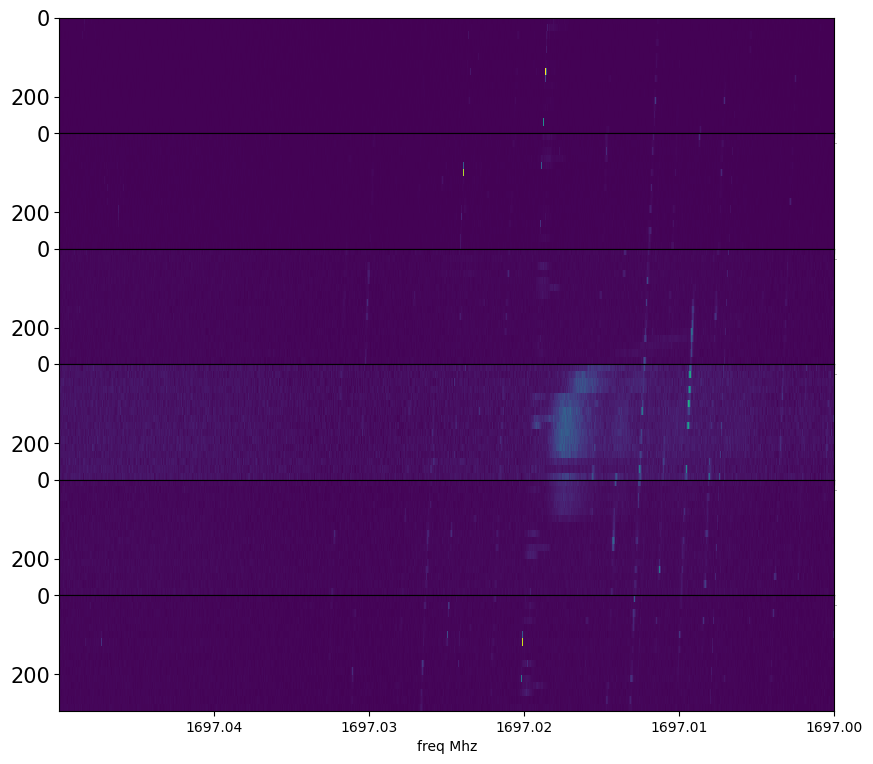

In [18]:
this_cadence_data, this_cadence_extents = files_plotter(interesting2,1697,1697.05,True)

In [13]:
len(this_cadence_data[0][0])

3579

In [4]:
def files_plotter(files,f_start,f_end,show_plot):
    '''
    Grabs the data of the waterfall object segment you are interested in
    '''

    this_cadence_data = []
    this_cadence_extents = []
    if show_plot == True:
        fig, axs = plt.subplots(len(files),figsize=(10, 1.5*len(files)))
    for file_number,file in enumerate(files):

    # print('getting data',file)
        obs = Waterfall(file,f_start=f_start,f_stop=f_end)
        # data = obs.data
        plot_f, plot_data = obs.grab_data(f_start=f_start,f_stop=f_end)
        plot_data = plot_data.astype('float32')
        # print('got data')
    
        #
        MAX_PLT_POINTS      = 65536                  # Max number of points in matplotlib plot
        MAX_IMSHOW_POINTS   = (8192, 4096)           # Max number of points in imshow plot
    
    
        dec_fac_x, dec_fac_y = 1, 1
        if plot_data.shape[0] > MAX_IMSHOW_POINTS[0]:
            dec_fac_x = int(plot_data.shape[0] / MAX_IMSHOW_POINTS[0])
    
        if plot_data.shape[1] > MAX_IMSHOW_POINTS[1]:
            dec_fac_y = int(plot_data.shape[1] / MAX_IMSHOW_POINTS[1])
            
        plot_data = utils.rebin(plot_data, dec_fac_x, dec_fac_y)
        extent = plotting.plot_utils.calc_extent(obs, plot_f=plot_f, plot_t=obs.timestamps, MJD_time=60098.829675925925)
        reverse=False
        if reverse==True:
                plot_data = plot_data[..., ::-1]  # Reverse data
                plot_f = plot_f[::-1]
        new_extent = list(extent)
        new_extent[2] = 0
        new_extent[3] = 292.057776
        new_extents = tuple(new_extent)


        if show_plot == True:
            axs[file_number].imshow(plot_data,
                           aspect='auto',
                           origin='lower',
                           rasterized=True,
                           interpolation='nearest',
                           extent = new_extents,
                           cmap='viridis',
                           )
            axs[file_number].set_xlabel("freq Mhz",fontsize=10)
            axs[file_number].tick_params(axis='x', which='major', labelsize=1)
            axs[file_number].set_ylim( axs[file_number].get_ylim()[::-1])
            axs[file_number].tick_params(axis='y', which='major', labelsize=15)
    
            if file_number == 5:
                axs[file_number].tick_params(axis='x', which='major', labelsize=10)
        this_cadence_data.append(plot_data)
        this_cadence_extents.append(extent)


    if show_plot == True:
        plt.subplots_adjust(hspace=0)
        plt.show()


    return this_cadence_data, this_cadence_extents

In [4]:
def cycle_events(all_events,data_dir,show_plot):
    '''
    Cycles through the hits of a given snr, plots them, and returns the events as np arrays 
    '''
    print('cycling!')
    all_plot_data = []
    all_extents = []
    all_file_names = []
    for i in range(0,len(all_events)):
        file = data_dir + all_events["FileID"][i]
        file = file[:-3]+"h5"
        drift_rate = all_events["DriftRate"][i]
        freq = all_events["Freq"][i]
        f_start = freq - (drift_rate/10**6)*2000
        f_end = freq + (drift_rate/10**6)*2000
    
    
        node = file.split("/")[-1][0:5]
        print(f"================================ {i} -- NODE {node} =============================")
        print("f_start,",f_start,"f_stop:",f_end,"file:",file)
              
        h5_list_path = grab_file_list(data_dir, '.h5',node)
        this_cadence_data = []
        this_cadence_extents = []
        all_file_names.append(h5_list_path)        
        # print(h5_list_path)
        this_cadence_data, this_cadence_extents = files_plotter(h5_list_path,f_start,f_end,show_plot)
        

        all_plot_data.append(this_cadence_data)
        all_extents.append(this_cadence_extents)
    return all_plot_data, all_extents, all_file_names


In [5]:
def grab_file_list(data_dir,file_type,node_number):
    '''
    returns h5 and dat file path from given directory, ordered correctly
    '''
    
    ## h5 list
    data_list = []
    for dirname, _, filenames in os.walk(data_dir):
        for filename in filenames:
            if filename[-len(file_type):] == file_type and node_number in filename:
                data_list.append(data_dir + filename)
                
    data_list = sorted(data_list, key=lambda x: (x,x.split('_')[5]))

    return data_list

In [6]:
test_run =[ 'AND_I',
 'AND_XI',
 'AND_XIV',
 'AND_XVI',
 'AND_XXIII']

In [6]:
def plot_events(snr):
    total_plot_data = []
    total_extents = []
    total_file_names = []
    for galaxy in L_band_galaxies:
        print("Galaxy: ",galaxy)
        try:
            galaxy_csv = pd.read_csv(f"/datax/scratch/calebp/seticore_testing/snr_testing/{snr}off10on/{galaxy}/master.csv")
            all_plot_data, all_extents, all_file_names = cycle_events(galaxy_csv,f"/datax/scratch/calebp/seticore_testing/snr_testing/{snr}off10on/{galaxy}/",True)
            for i in all_plot_data:
                total_plot_data.append(i)
            for i in all_extents:
                total_extents.append(i)
            for i in all_file_names:
                total_file_names.append(i)
        except:
            print(f"No events for {galaxy}")
        
                            
    return total_plot_data, total_extents, total_file_names


In [338]:
L_band_galaxies = ['HERCULES', 'HIZSS003', 'IC0010', 'IC0342', 'IC1613', 'LEOA', 'LEOII', 'LEOT', 'LGS3', 'MAFFEI1', 'MAFFEI2', 'MESSIER031', 'MESSIER033', 'MESSIER081', 'MESSIER101', 'MESSIER49', 'MESSIER59', 'MESSIER60', 'MESSIER84', 'MESSIER86', 'MESSIER87', 'NGC0185', 'NGC0628', 'NGC0672 ', 'NGC1052', 'NGC1172 ', 'NGC1400', 'NGC1407', 'NGC2403','NGC2683', 'NGC2787', 'NGC3193', 'NGC3226', 'NGC3344', 'NGC3379', 'NGC4136', 'NGC4168', 'NGC4239', 'NGC4244', 'NGC4258', 'NGC4318', 'NGC4365', 'NGC4387', 'NGC4434', 'NGC4458', 'NGC4473', 'NGC4478', 'NGC4486B', 'NGC4489', 'NGC4551', 'NGC4559', 'NGC4564', 'NGC4600', 'NGC4618', 'NGC4660', 'NGC4736', 'NGC4826', 'NGC5194', 'NGC5195', 'NGC5322', 'NGC5638', 'NGC5813', 'NGC5831', 'NGC584', 'NGC5845', 'NGC5846', 'NGC596', 'NGC636', 'NGC6503', 'NGC6822', 'NGC6946', 'NGC720', 'NGC7454 ', 'NGC7640', 'NGC821', 'PEGASUS', 'SAG_DIR', 'SEXA', 'SEXB', 'SEXDSPH', 'UGC04879', 'UGCA127', 'UMIN'] 
L_band_galaxies = ['MESSIER031','AND_II']

print(len(L_band_galaxies))

2


Galaxy:  MESSIER031
cycling!
================================ 0 -- NODE blc73 =============================
f_start, 1598.4861265099998 f_stop: 1598.48367749 file: /datax/scratch/calebp/seticore_testing/snr_testing/8off10on/MESSIER031/blc73_guppi_58832_16209_MESSIER031_0057.gpuspec.0000.h5
blimpy.io.base_reader WARNING  Given f_stop < f_start, assuming reversed values.
blimpy.io.base_reader WARNING  Given f_stop < f_start, assuming reversed values.
blimpy.io.base_reader WARNING  Given f_stop < f_start, assuming reversed values.
blimpy.io.base_reader WARNING  Given f_stop < f_start, assuming reversed values.
blimpy.io.base_reader WARNING  Given f_stop < f_start, assuming reversed values.
blimpy.io.base_reader WARNING  Given f_stop < f_start, assuming reversed values.


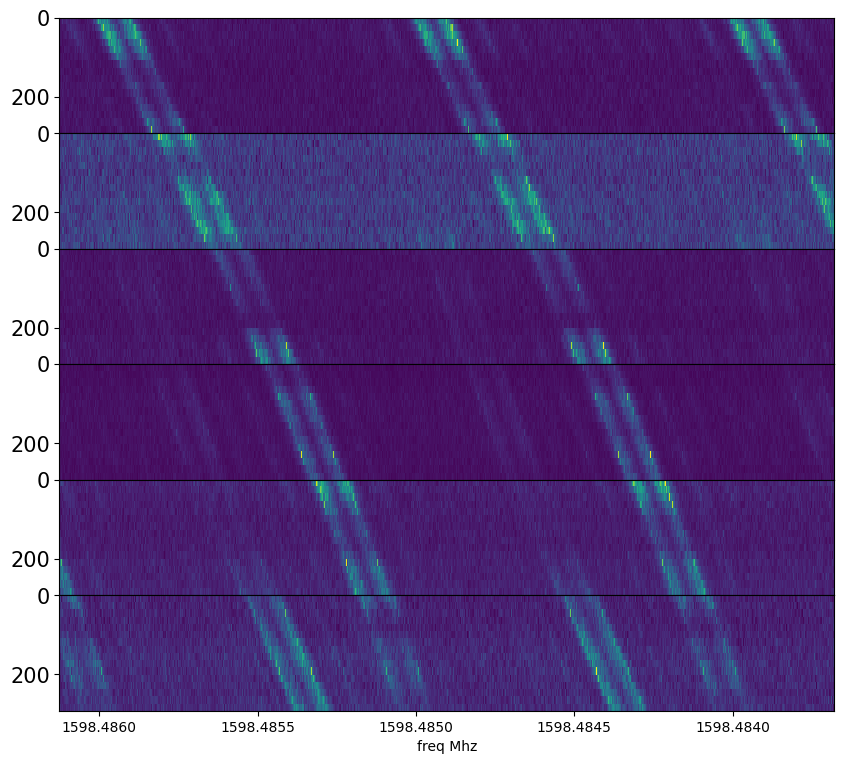

================================ 1 -- NODE blc73 =============================
f_start, 1598.485617652 f_stop: 1598.483454348 file: /datax/scratch/calebp/seticore_testing/snr_testing/8off10on/MESSIER031/blc73_guppi_58832_16851_MESSIER031_0059.gpuspec.0000.h5
blimpy.io.base_reader WARNING  Given f_stop < f_start, assuming reversed values.
blimpy.io.base_reader WARNING  Given f_stop < f_start, assuming reversed values.
blimpy.io.base_reader WARNING  Given f_stop < f_start, assuming reversed values.
blimpy.io.base_reader WARNING  Given f_stop < f_start, assuming reversed values.
blimpy.io.base_reader WARNING  Given f_stop < f_start, assuming reversed values.
blimpy.io.base_reader WARNING  Given f_stop < f_start, assuming reversed values.


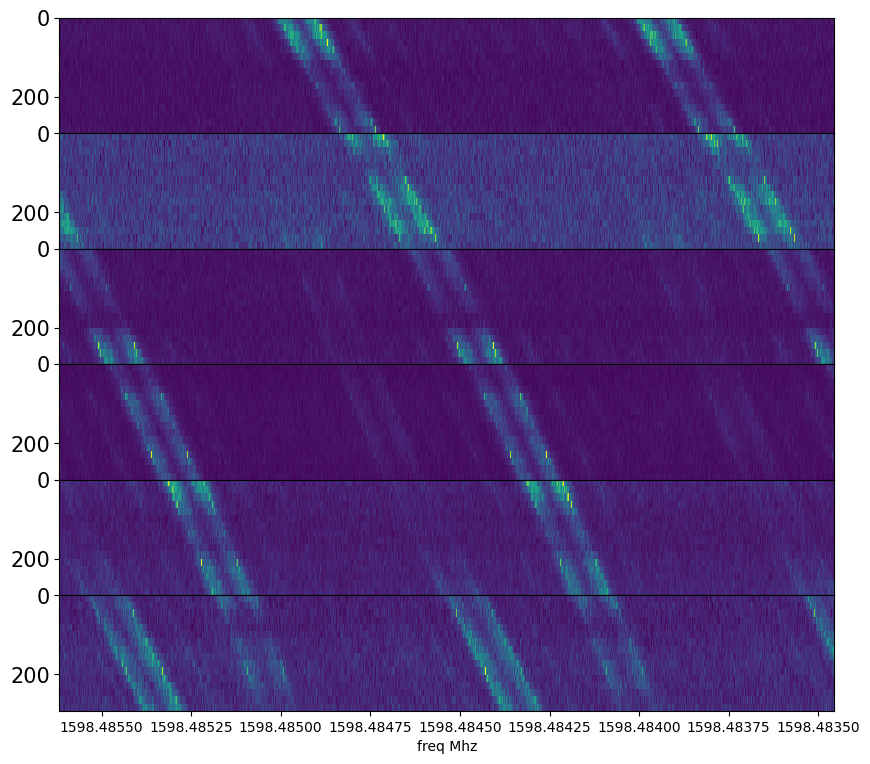

================================ 2 -- NODE blc73 =============================
f_start, 1598.485153792 f_stop: 1598.483276208 file: /datax/scratch/calebp/seticore_testing/snr_testing/8off10on/MESSIER031/blc73_guppi_58832_17485_MESSIER031_0061.gpuspec.0000.h5
blimpy.io.base_reader WARNING  Given f_stop < f_start, assuming reversed values.
blimpy.io.base_reader WARNING  Given f_stop < f_start, assuming reversed values.
blimpy.io.base_reader WARNING  Given f_stop < f_start, assuming reversed values.
blimpy.io.base_reader WARNING  Given f_stop < f_start, assuming reversed values.
blimpy.io.base_reader WARNING  Given f_stop < f_start, assuming reversed values.
blimpy.io.base_reader WARNING  Given f_stop < f_start, assuming reversed values.


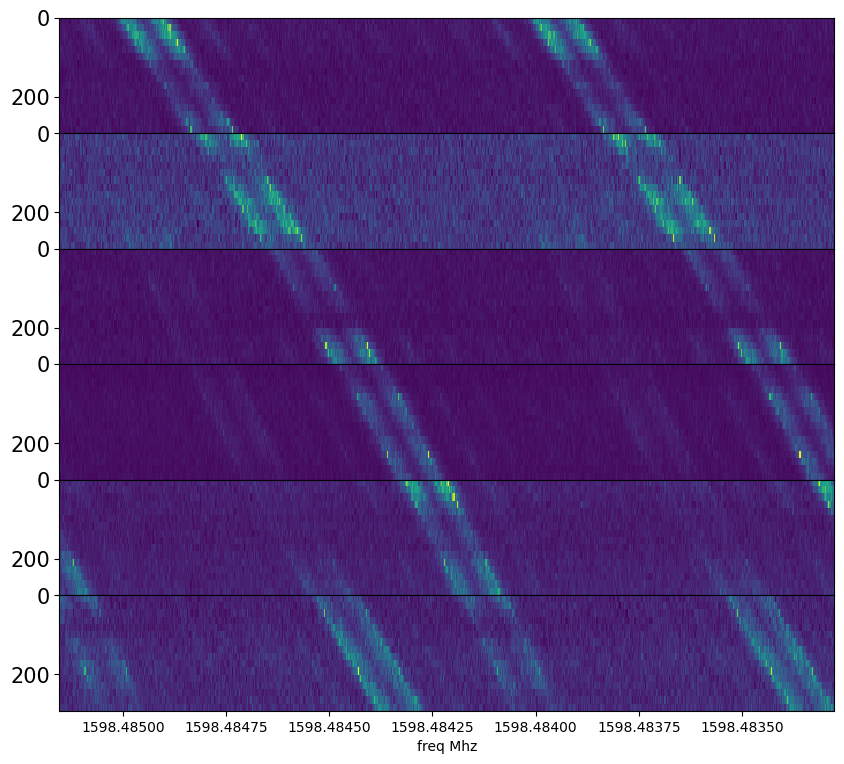

Galaxy:  AND_II
cycling!
================================ 0 -- NODE blc03 =============================
f_start, 1626.0812504 f_stop: 1626.0678216000001 file: /datax/scratch/calebp/seticore_testing/snr_testing/8off10on/AND_II/blc03_guppi_59405_44453_And_II_0028.rawspec.0000.h5
blimpy.io.base_reader WARNING  Given f_stop < f_start, assuming reversed values.
blimpy.io.base_reader WARNING  Given f_stop < f_start, assuming reversed values.
blimpy.io.base_reader WARNING  Given f_stop < f_start, assuming reversed values.
blimpy.io.base_reader WARNING  Given f_stop < f_start, assuming reversed values.
blimpy.io.base_reader WARNING  Given f_stop < f_start, assuming reversed values.
blimpy.io.base_reader WARNING  Given f_stop < f_start, assuming reversed values.


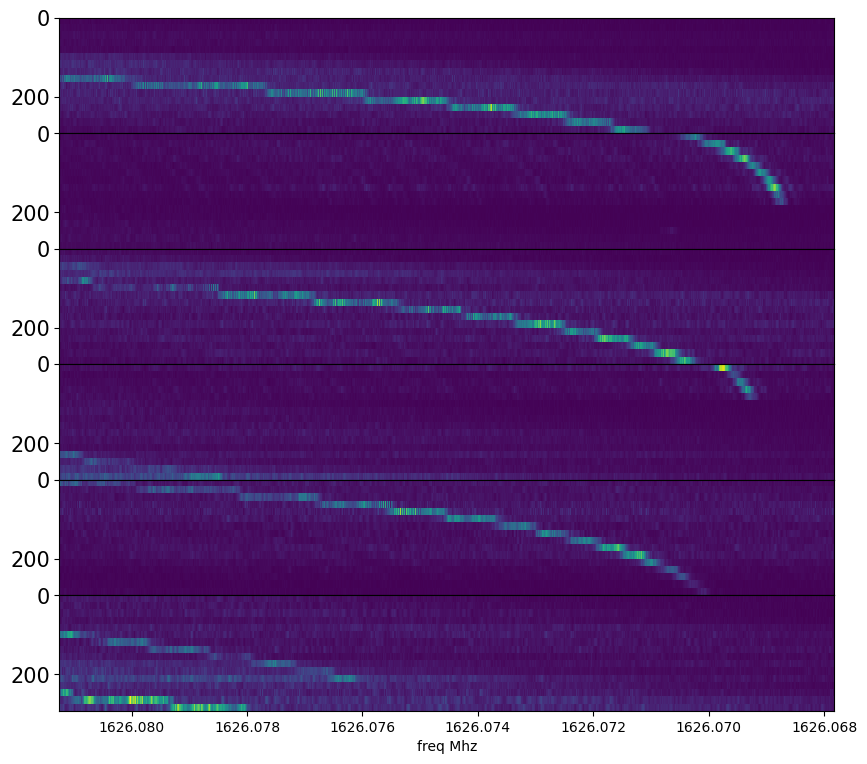

================================ 1 -- NODE blc03 =============================
f_start, 1626.080629094 f_stop: 1626.064832906 file: /datax/scratch/calebp/seticore_testing/snr_testing/8off10on/AND_II/blc03_guppi_59405_45085_And_II_0030.rawspec.0000.h5
blimpy.io.base_reader WARNING  Given f_stop < f_start, assuming reversed values.
blimpy.io.base_reader WARNING  Given f_stop < f_start, assuming reversed values.
blimpy.io.base_reader WARNING  Given f_stop < f_start, assuming reversed values.
blimpy.io.base_reader WARNING  Given f_stop < f_start, assuming reversed values.
blimpy.io.base_reader WARNING  Given f_stop < f_start, assuming reversed values.
blimpy.io.base_reader WARNING  Given f_stop < f_start, assuming reversed values.


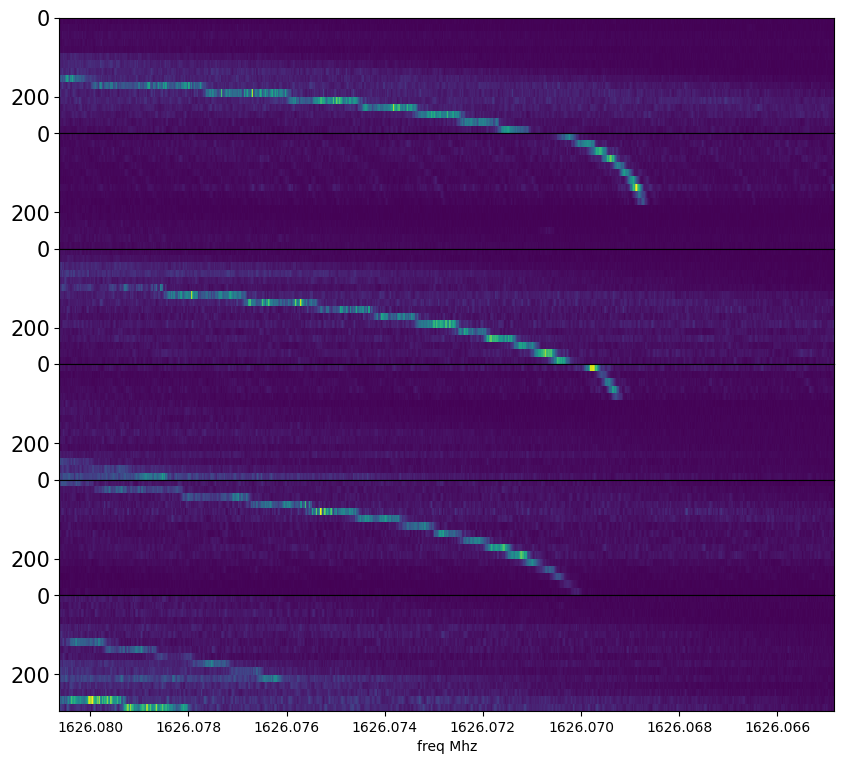

================================ 2 -- NODE blc03 =============================
f_start, 1626.0795998259998 f_stop: 1626.064130174 file: /datax/scratch/calebp/seticore_testing/snr_testing/8off10on/AND_II/blc03_guppi_59405_45735_And_II_0032.rawspec.0000.h5
blimpy.io.base_reader WARNING  Given f_stop < f_start, assuming reversed values.
blimpy.io.base_reader WARNING  Given f_stop < f_start, assuming reversed values.
blimpy.io.base_reader WARNING  Given f_stop < f_start, assuming reversed values.
blimpy.io.base_reader WARNING  Given f_stop < f_start, assuming reversed values.
blimpy.io.base_reader WARNING  Given f_stop < f_start, assuming reversed values.
blimpy.io.base_reader WARNING  Given f_stop < f_start, assuming reversed values.


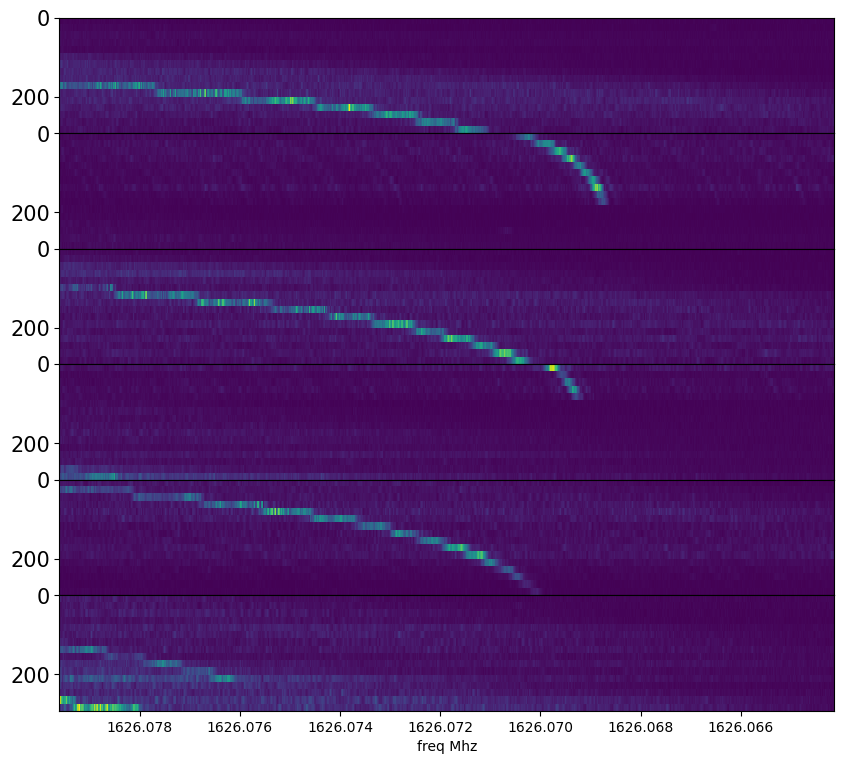

================================ 3 -- NODE blc04 =============================
f_start, 1379.314182286 f_stop: 1379.3118557139999 file: /datax/scratch/calebp/seticore_testing/snr_testing/8off10on/AND_II/blc04_guppi_59405_44453_And_II_0028.rawspec.0000.h5
blimpy.io.base_reader WARNING  Given f_stop < f_start, assuming reversed values.
blimpy.io.base_reader WARNING  Given f_stop < f_start, assuming reversed values.
blimpy.io.base_reader WARNING  Given f_stop < f_start, assuming reversed values.
blimpy.io.base_reader WARNING  Given f_stop < f_start, assuming reversed values.
blimpy.io.base_reader WARNING  Given f_stop < f_start, assuming reversed values.
blimpy.io.base_reader WARNING  Given f_stop < f_start, assuming reversed values.


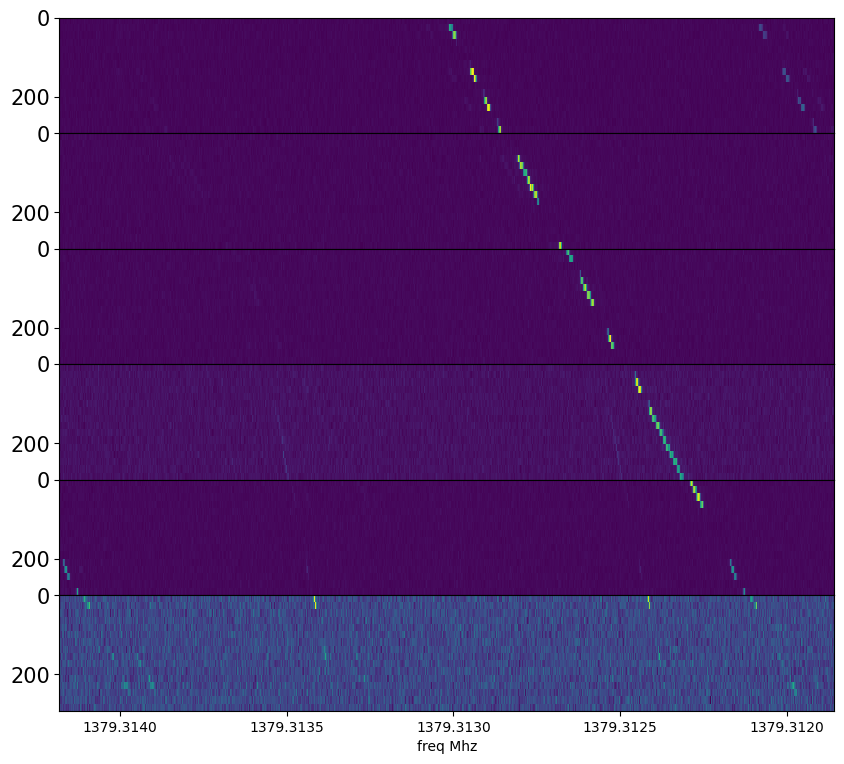

================================ 4 -- NODE blc04 =============================
f_start, 1379.3138192860001 f_stop: 1379.311492714 file: /datax/scratch/calebp/seticore_testing/snr_testing/8off10on/AND_II/blc04_guppi_59405_45085_And_II_0030.rawspec.0000.h5
blimpy.io.base_reader WARNING  Given f_stop < f_start, assuming reversed values.
blimpy.io.base_reader WARNING  Given f_stop < f_start, assuming reversed values.
blimpy.io.base_reader WARNING  Given f_stop < f_start, assuming reversed values.
blimpy.io.base_reader WARNING  Given f_stop < f_start, assuming reversed values.
blimpy.io.base_reader WARNING  Given f_stop < f_start, assuming reversed values.
blimpy.io.base_reader WARNING  Given f_stop < f_start, assuming reversed values.


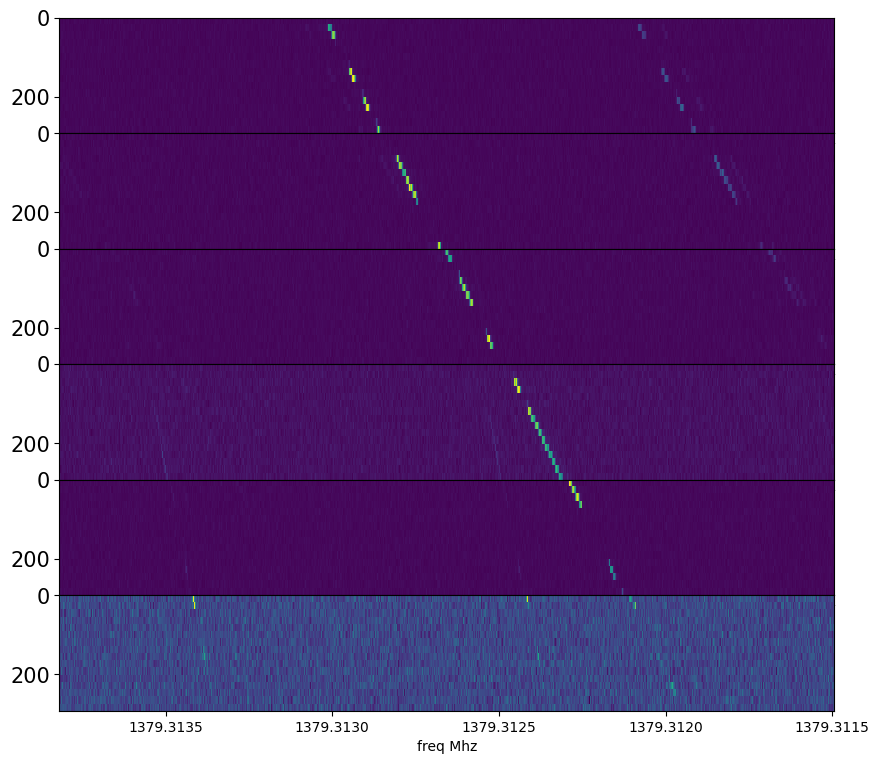

================================ 5 -- NODE blc04 =============================
f_start, 1379.313450286 f_stop: 1379.311123714 file: /datax/scratch/calebp/seticore_testing/snr_testing/8off10on/AND_II/blc04_guppi_59405_45735_And_II_0032.rawspec.0000.h5
blimpy.io.base_reader WARNING  Given f_stop < f_start, assuming reversed values.
blimpy.io.base_reader WARNING  Given f_stop < f_start, assuming reversed values.
blimpy.io.base_reader WARNING  Given f_stop < f_start, assuming reversed values.
blimpy.io.base_reader WARNING  Given f_stop < f_start, assuming reversed values.
blimpy.io.base_reader WARNING  Given f_stop < f_start, assuming reversed values.
blimpy.io.base_reader WARNING  Given f_stop < f_start, assuming reversed values.


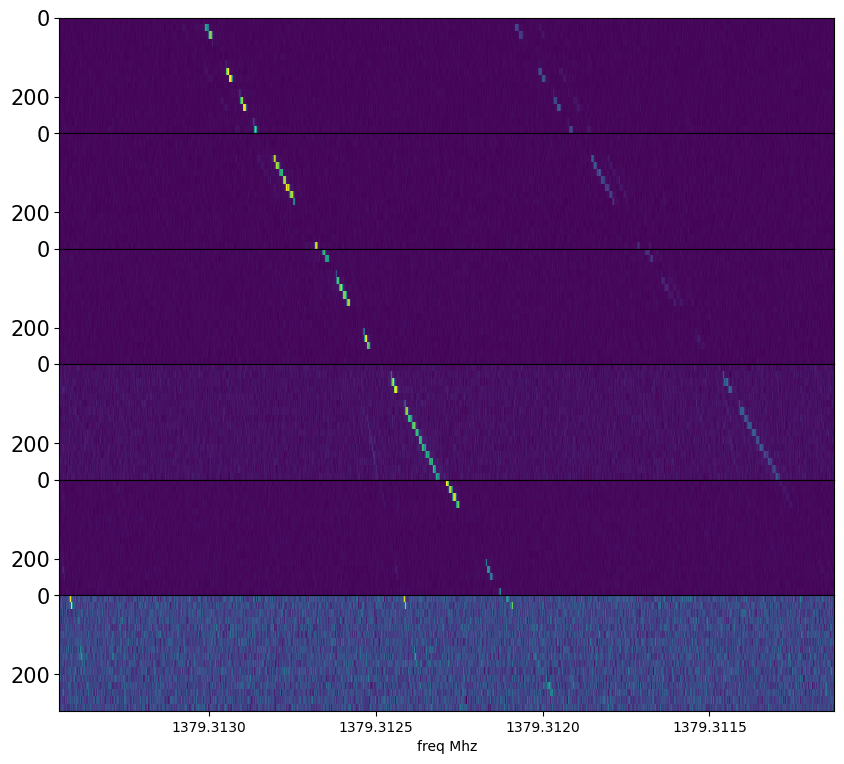

================================ 6 -- NODE blc73 =============================
f_start, 1626.1445417539999 f_stop: 1626.130378246 file: /datax/scratch/calebp/seticore_testing/snr_testing/8off10on/AND_II/blc73_guppi_58832_23983_And_II_0081.gpuspec.0000.h5
blimpy.io.base_reader WARNING  Given f_stop < f_start, assuming reversed values.
blimpy.io.base_reader WARNING  Given f_stop < f_start, assuming reversed values.
blimpy.io.base_reader WARNING  Given f_stop < f_start, assuming reversed values.
blimpy.io.base_reader WARNING  Given f_stop < f_start, assuming reversed values.
blimpy.io.base_reader WARNING  Given f_stop < f_start, assuming reversed values.
blimpy.io.base_reader WARNING  Given f_stop < f_start, assuming reversed values.


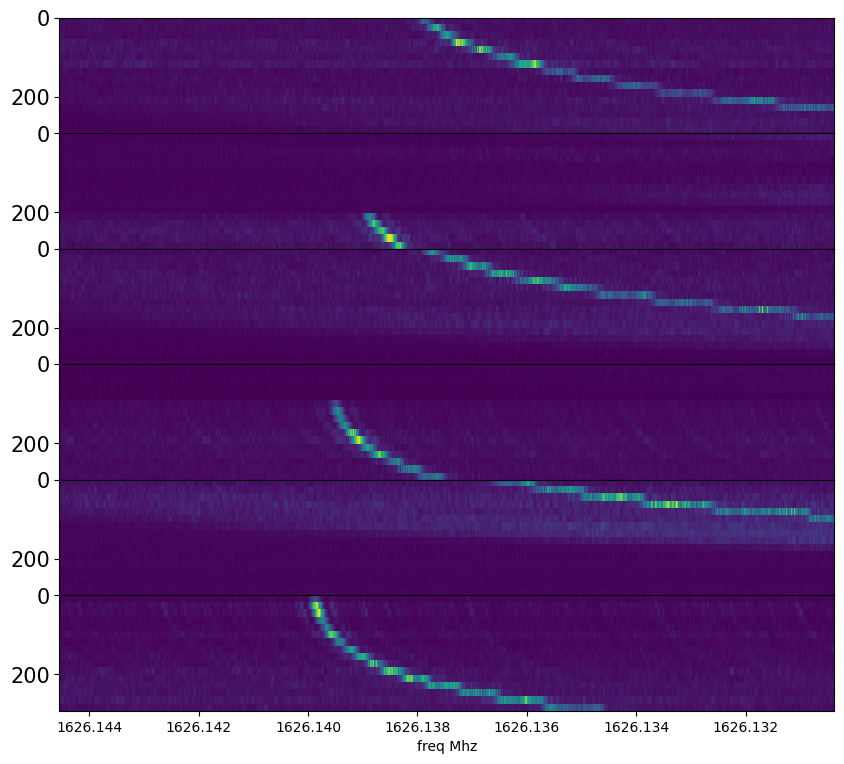

================================ 7 -- NODE blc73 =============================
f_start, 1626.144339796 f_stop: 1626.129972204 file: /datax/scratch/calebp/seticore_testing/snr_testing/8off10on/AND_II/blc73_guppi_58832_24618_And_II_0083.gpuspec.0000.h5
blimpy.io.base_reader WARNING  Given f_stop < f_start, assuming reversed values.
blimpy.io.base_reader WARNING  Given f_stop < f_start, assuming reversed values.
blimpy.io.base_reader WARNING  Given f_stop < f_start, assuming reversed values.
blimpy.io.base_reader WARNING  Given f_stop < f_start, assuming reversed values.
blimpy.io.base_reader WARNING  Given f_stop < f_start, assuming reversed values.
blimpy.io.base_reader WARNING  Given f_stop < f_start, assuming reversed values.


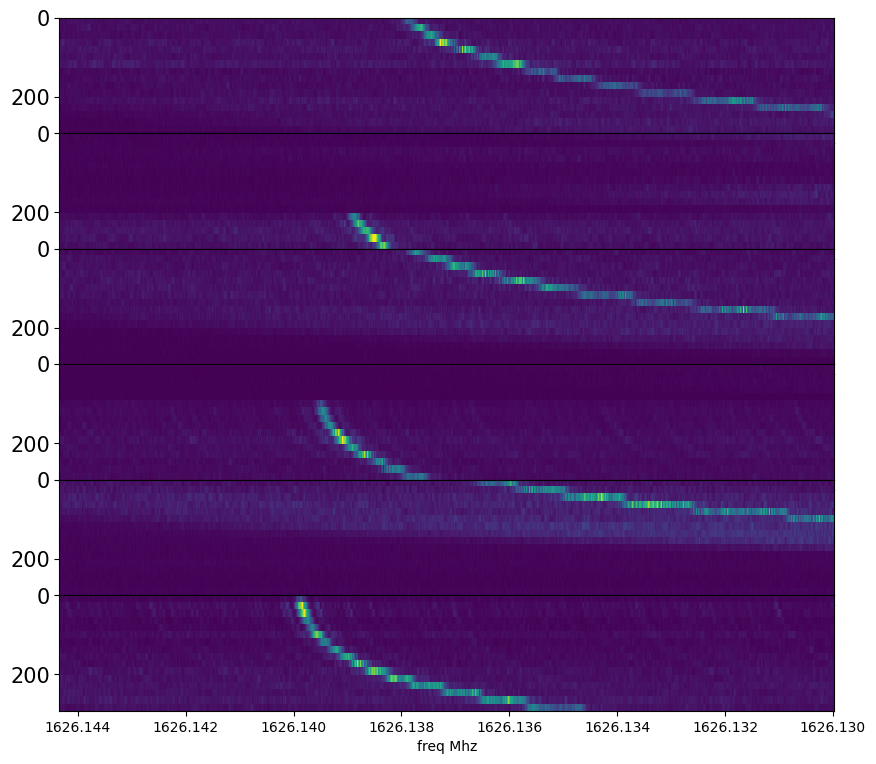

================================ 8 -- NODE blc73 =============================
f_start, 1626.12659926 f_stop: 1626.14166074 file: /datax/scratch/calebp/seticore_testing/snr_testing/8off10on/AND_II/blc73_guppi_58832_25266_And_II_0085.gpuspec.0000.h5


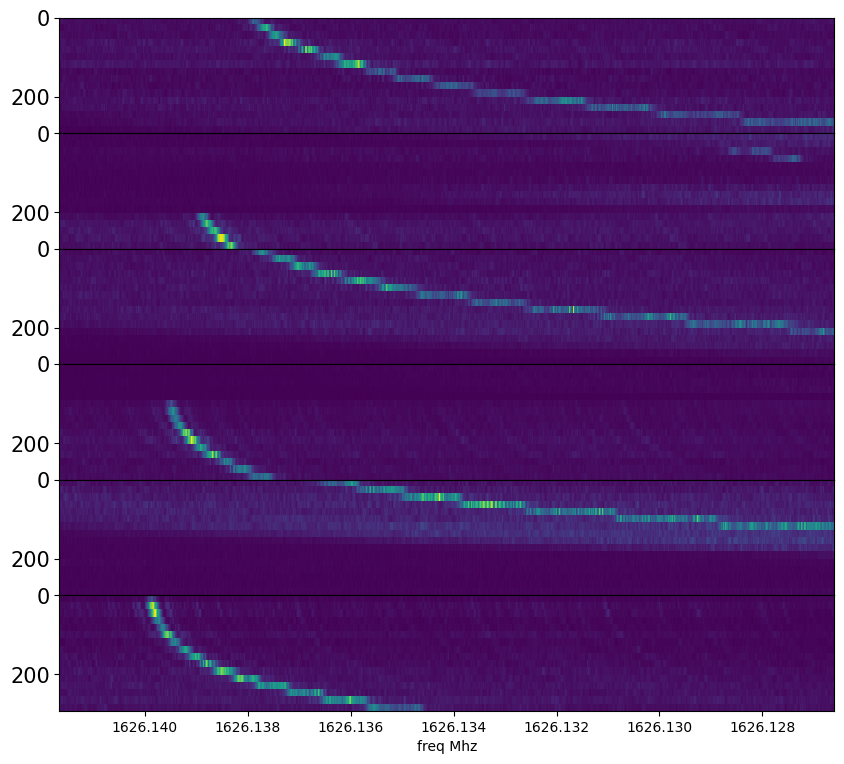

================================ 9 -- NODE blc73 =============================
f_start, 1626.1062608500001 f_stop: 1626.12136315 file: /datax/scratch/calebp/seticore_testing/snr_testing/8off10on/AND_II/blc73_guppi_58832_23983_And_II_0081.gpuspec.0000.h5


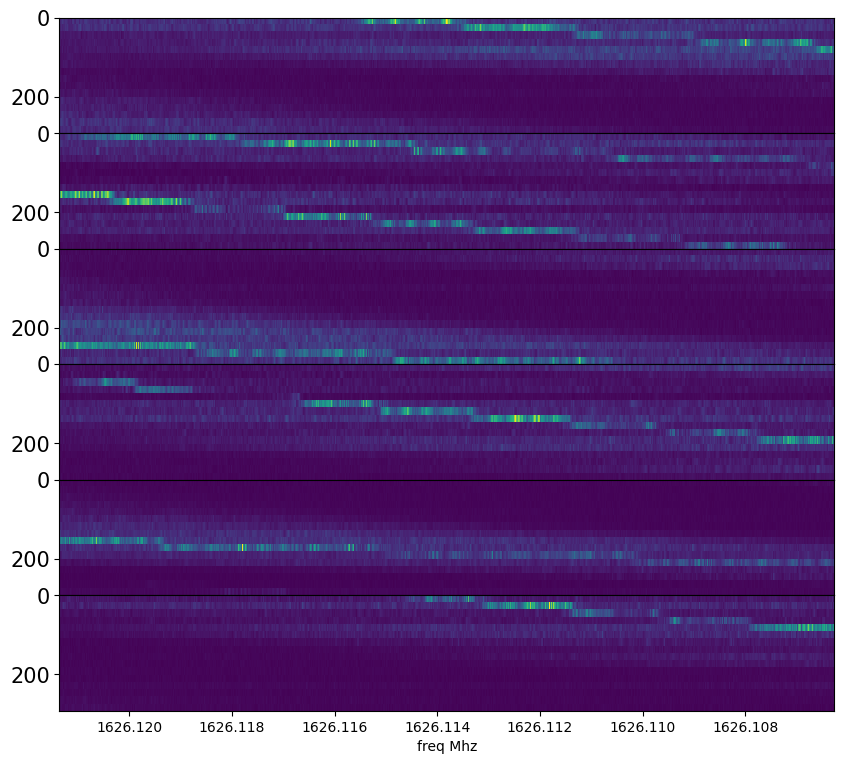

================================ 10 -- NODE blc73 =============================
f_start, 1626.1066461320002 f_stop: 1626.122319868 file: /datax/scratch/calebp/seticore_testing/snr_testing/8off10on/AND_II/blc73_guppi_58832_24618_And_II_0083.gpuspec.0000.h5


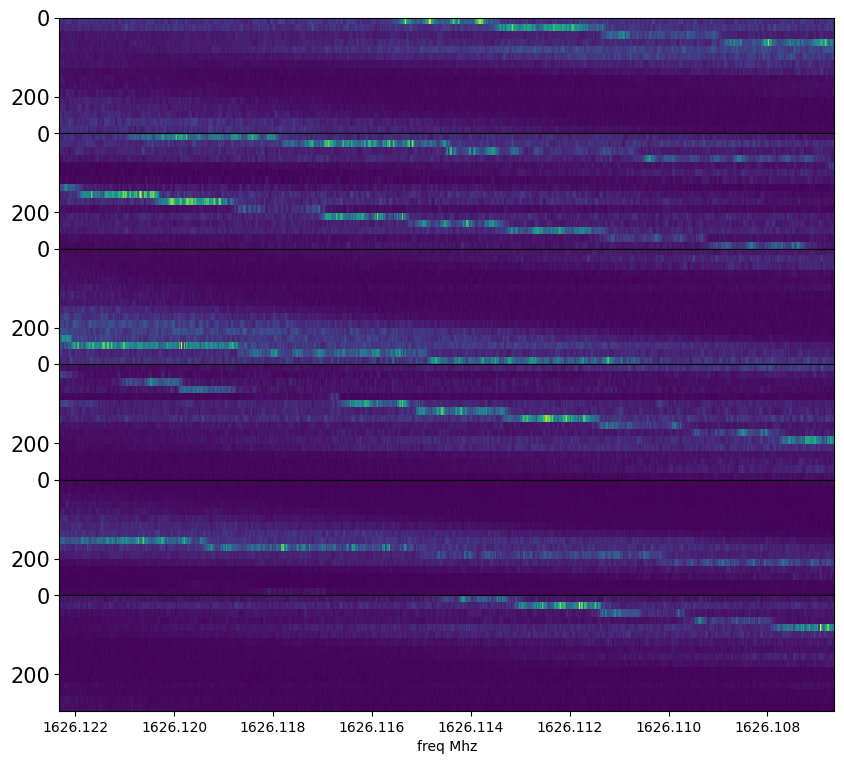

================================ 11 -- NODE blc73 =============================
f_start, 1626.1230880419998 f_stop: 1626.113291958 file: /datax/scratch/calebp/seticore_testing/snr_testing/8off10on/AND_II/blc73_guppi_58832_25266_And_II_0085.gpuspec.0000.h5
blimpy.io.base_reader WARNING  Given f_stop < f_start, assuming reversed values.
blimpy.io.base_reader WARNING  Given f_stop < f_start, assuming reversed values.
blimpy.io.base_reader WARNING  Given f_stop < f_start, assuming reversed values.
blimpy.io.base_reader WARNING  Given f_stop < f_start, assuming reversed values.
blimpy.io.base_reader WARNING  Given f_stop < f_start, assuming reversed values.
blimpy.io.base_reader WARNING  Given f_stop < f_start, assuming reversed values.


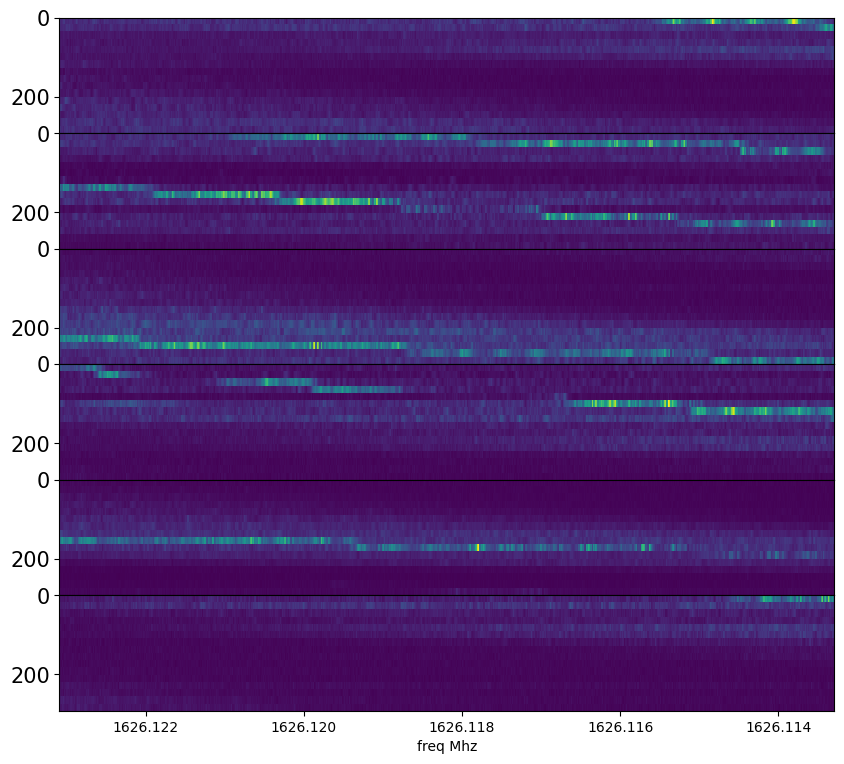

================================ 12 -- NODE blc73 =============================
f_start, 1580.536013694 f_stop: 1580.533646306 file: /datax/scratch/calebp/seticore_testing/snr_testing/8off10on/AND_II/blc73_guppi_58832_23983_And_II_0081.gpuspec.0000.h5
blimpy.io.base_reader WARNING  Given f_stop < f_start, assuming reversed values.
blimpy.io.base_reader WARNING  Given f_stop < f_start, assuming reversed values.
blimpy.io.base_reader WARNING  Given f_stop < f_start, assuming reversed values.
blimpy.io.base_reader WARNING  Given f_stop < f_start, assuming reversed values.
blimpy.io.base_reader WARNING  Given f_stop < f_start, assuming reversed values.
blimpy.io.base_reader WARNING  Given f_stop < f_start, assuming reversed values.


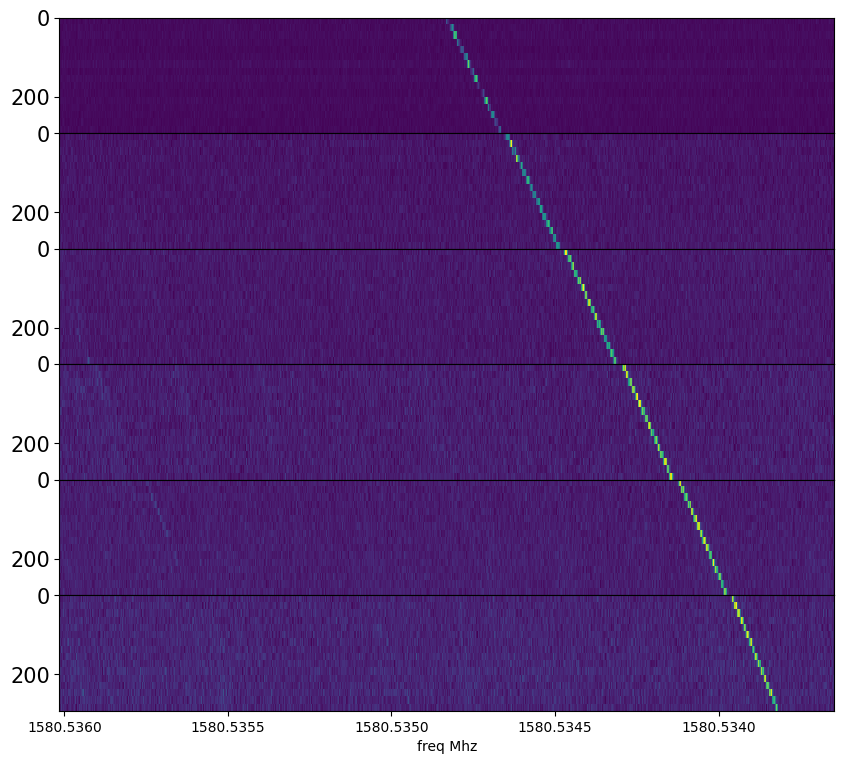

================================ 13 -- NODE blc73 =============================
f_start, 1580.53556606 f_stop: 1580.53336194 file: /datax/scratch/calebp/seticore_testing/snr_testing/8off10on/AND_II/blc73_guppi_58832_24618_And_II_0083.gpuspec.0000.h5
blimpy.io.base_reader WARNING  Given f_stop < f_start, assuming reversed values.
blimpy.io.base_reader WARNING  Given f_stop < f_start, assuming reversed values.
blimpy.io.base_reader WARNING  Given f_stop < f_start, assuming reversed values.
blimpy.io.base_reader WARNING  Given f_stop < f_start, assuming reversed values.
blimpy.io.base_reader WARNING  Given f_stop < f_start, assuming reversed values.
blimpy.io.base_reader WARNING  Given f_stop < f_start, assuming reversed values.


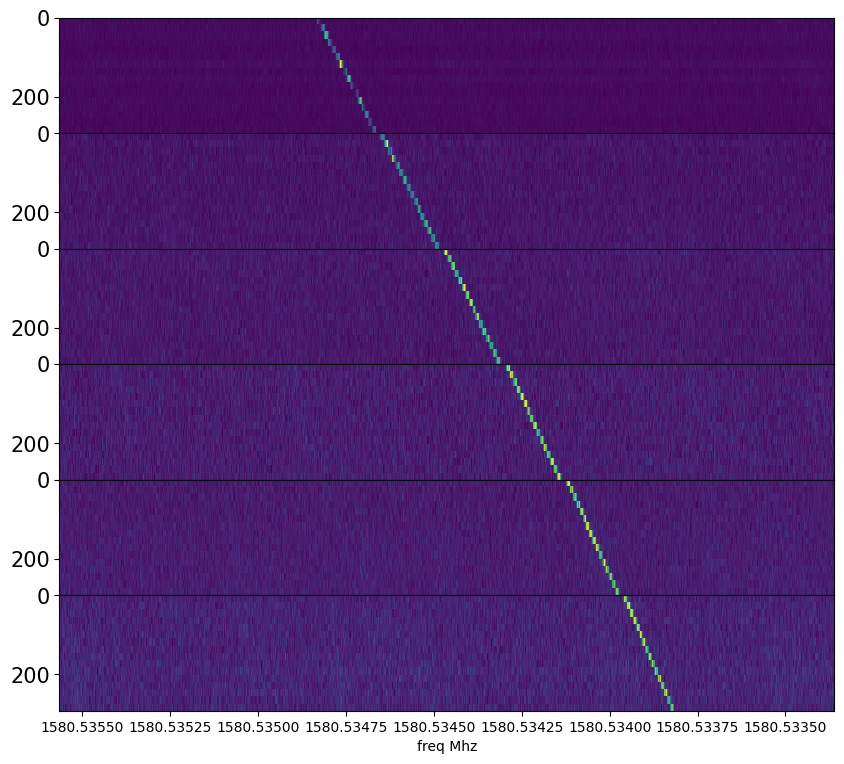

================================ 14 -- NODE blc73 =============================
f_start, 1580.535115018 f_stop: 1580.533114982 file: /datax/scratch/calebp/seticore_testing/snr_testing/8off10on/AND_II/blc73_guppi_58832_25266_And_II_0085.gpuspec.0000.h5
blimpy.io.base_reader WARNING  Given f_stop < f_start, assuming reversed values.
blimpy.io.base_reader WARNING  Given f_stop < f_start, assuming reversed values.
blimpy.io.base_reader WARNING  Given f_stop < f_start, assuming reversed values.
blimpy.io.base_reader WARNING  Given f_stop < f_start, assuming reversed values.
blimpy.io.base_reader WARNING  Given f_stop < f_start, assuming reversed values.
blimpy.io.base_reader WARNING  Given f_stop < f_start, assuming reversed values.


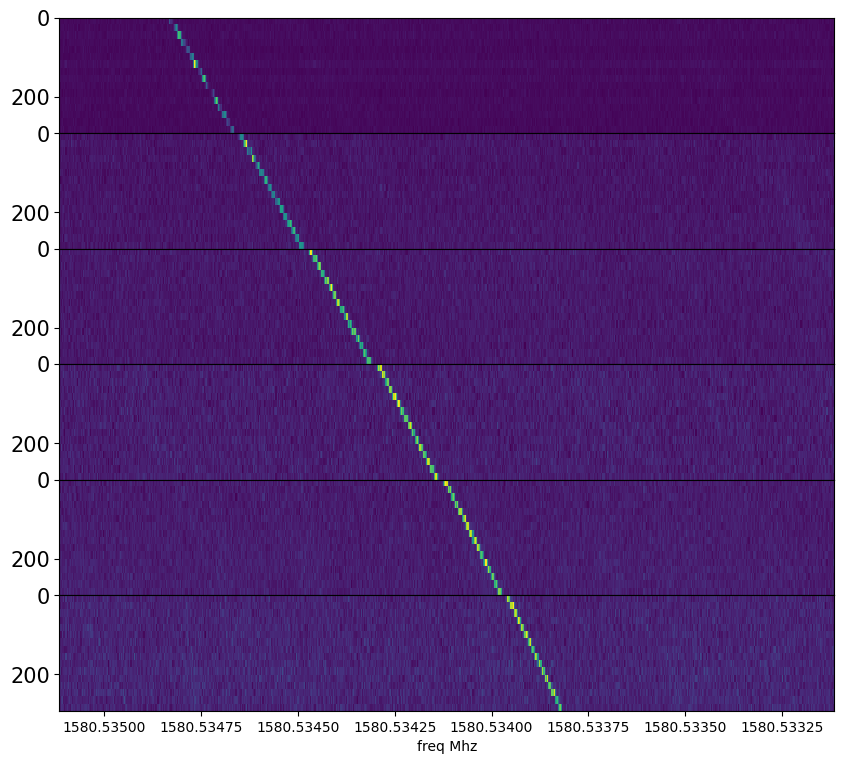

In [342]:
all_plot_data, all_extents, all_file_names = plot_events(8)

In [343]:
len(all_plot_data)

18

# Image Clustering

In [82]:
def reformat(cadence):
    # load numpy array in
    one_cadence = np.concatenate(tuple(cadence),axis=0)
    one_cadence = (one_cadence - np.amin(one_cadence)) / np.amax(one_cadence)
    one_cadence = (one_cadence - 1)*-1
    
    cadencecopy = one_cadence.flatten()

    one_cadence = cv2.medianBlur(one_cadence, 3)
    common = np.quantile(cadencecopy,.1)

    one_cadence[one_cadence < common] = 0

    
    # reformat to 224x224
    res = cv2.resize(one_cadence, dsize=(224, 224), interpolation=cv2.INTER_CUBIC)
    # now convert to three channels
    res = np.expand_dims(res, -1)
    res = res.repeat(3, axis=-1)

    return res


In [167]:
print(all_cadences[0].shape)

(224, 224, 3)


In [16]:
import cv2


In [14]:
with open("/datax/scratch/calebp/seticore_testing/all_plot_data.np", "rb") as fp:   #Pickling
    all_plot_data = pickle.load(fp)

In [139]:
with open("/datax/scratch/calebp/seticore_testing/anomaly.np", "rb") as fp:   #Pickling
    anomaly = pickle.load(fp)

In [145]:
len(all_plot_data)

609

In [144]:
for i in anomaly:
    all_plot_data.append(i)

In [147]:
all_cadences = []
for i in all_plot_data:
    res = reformat(i)
    all_cadences.append(res)

In [46]:
from scipy import stats
from scipy.ndimage.filters import gaussian_filter


/tmp/ipykernel_2904284/3353485897.py:2: DeprecationWarning: Please use `gaussian_filter` from the `scipy.ndimage` namespace, the `scipy.ndimage.filters` namespace is deprecated.
  from scipy.ndimage.filters import gaussian_filter


In [156]:
all_plot_data = all_plot_data[:-3]

In [173]:
len(all_plot_data)

606

Image number: 603
matplotlib.image WARNING  Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


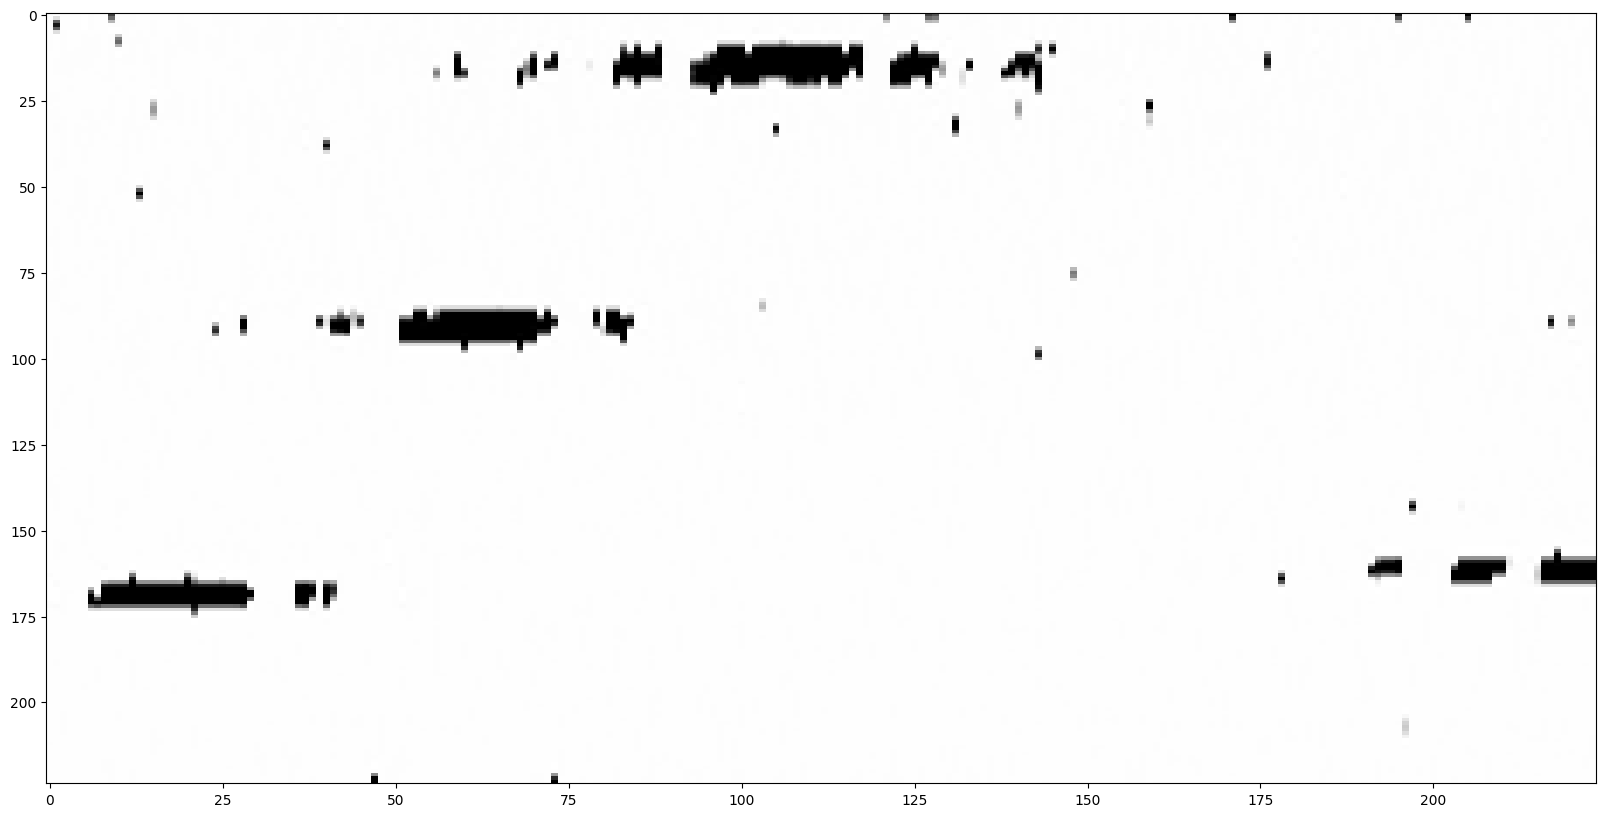

Image number: 604
matplotlib.image WARNING  Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


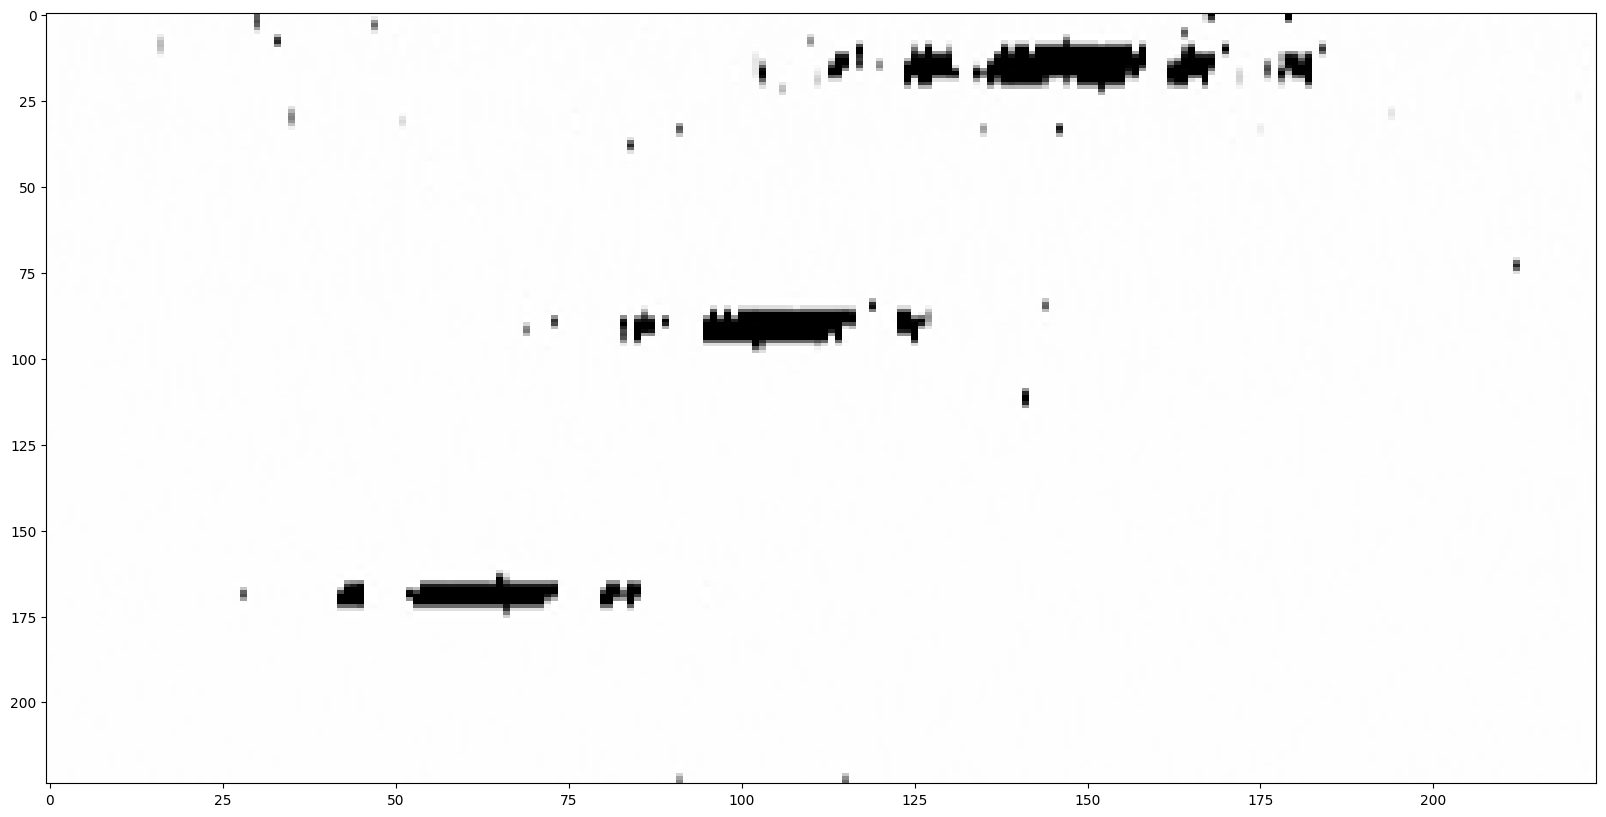

Image number: 605
matplotlib.image WARNING  Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


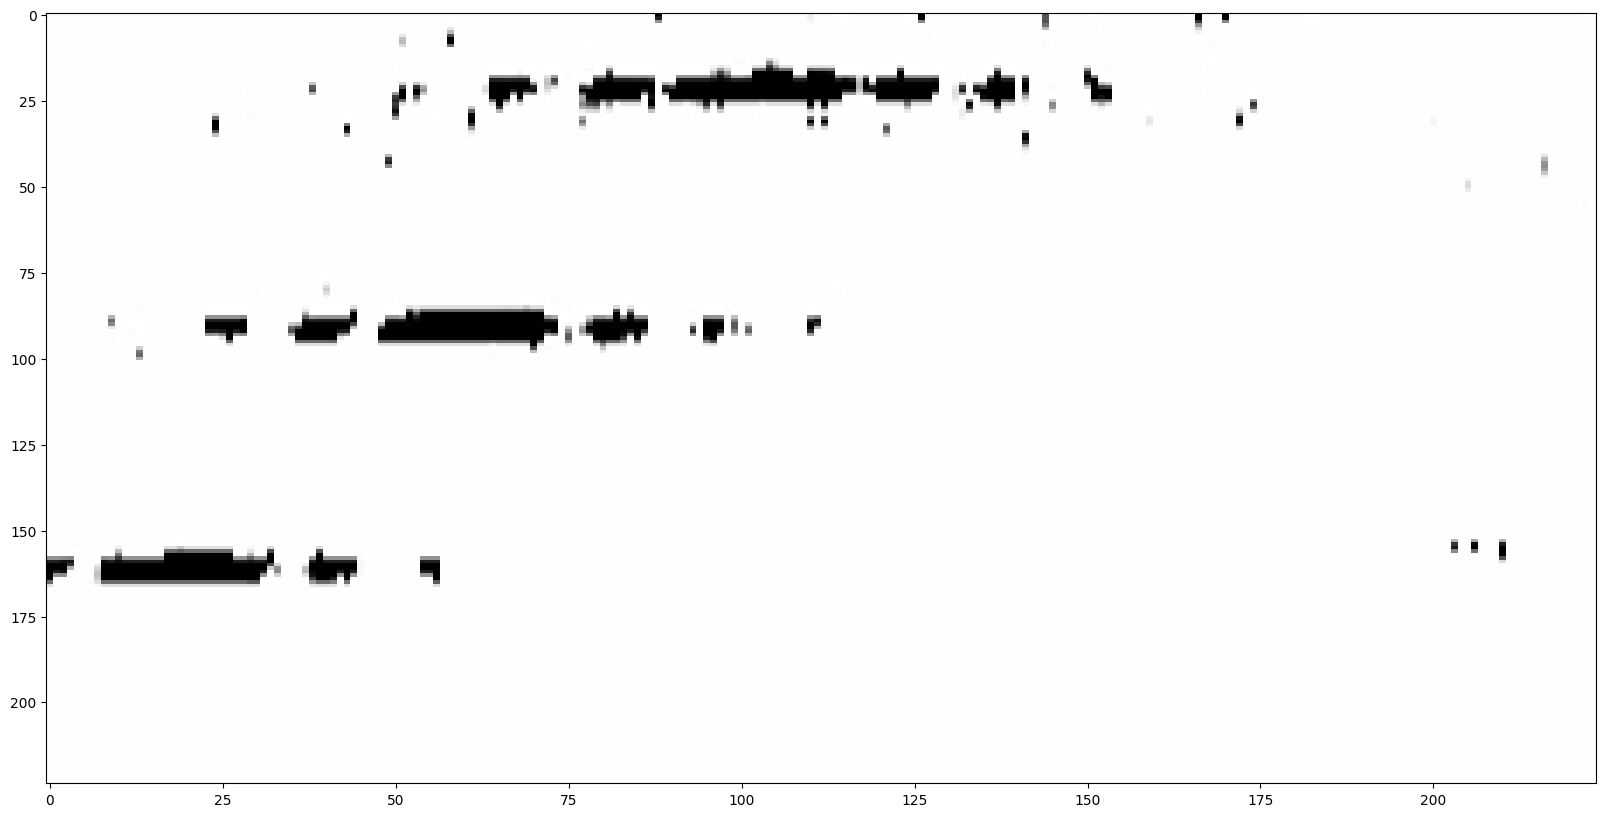

Image number: 606
matplotlib.image WARNING  Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


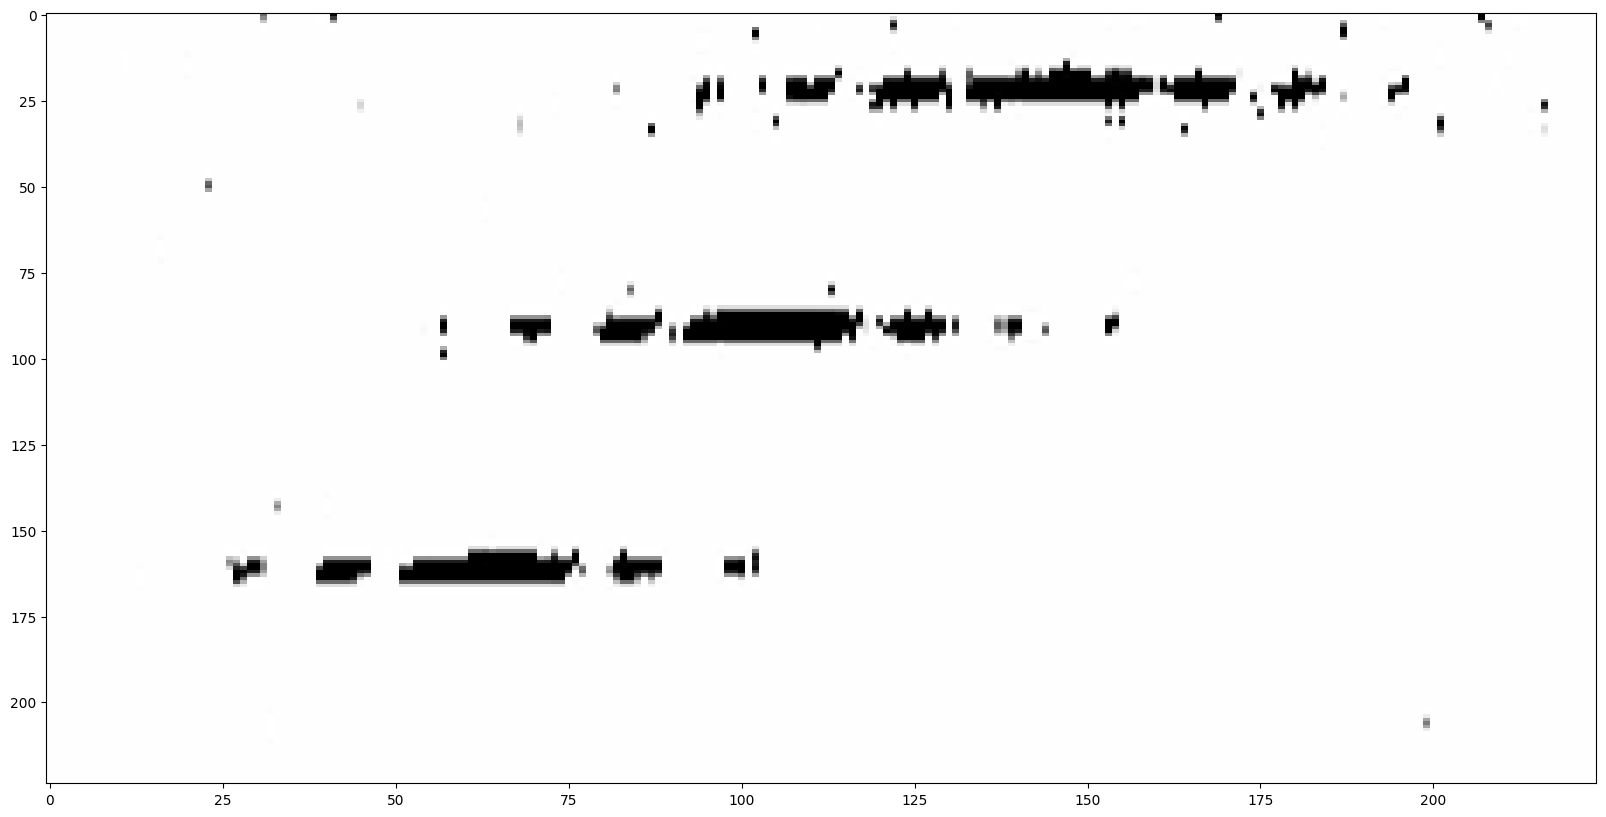

In [158]:
plt.rcParams["figure.figsize"] = (20,10)   

cadences_copy = all_cadences.copy()
for i in [603,604,605,606]:
    print("Image number:",i)
    cadence = cadences_copy[i]


    plt.imshow(cadence,aspect='auto')
    plt.show()


In [67]:
# Gap Statistic for K means
def optimalK(data, nrefs=3, maxClusters=15):
    """
    Calculates KMeans optimal K using Gap Statistic 
    Params:
        data: ndarry of shape (n_samples, n_features)
        nrefs: number of sample reference datasets to create
        maxClusters: Maximum number of clusters to test for
    Returns: (gaps, optimalK)
    """
    gaps = np.zeros((len(range(1, maxClusters)),))
    resultsdf = pd.DataFrame({'clusterCount':[], 'gap':[]})
    for gap_index, k in enumerate(range(1, maxClusters)):
# Holder for reference dispersion results
        refDisps = np.zeros(nrefs)
# For n references, generate random sample and perform kmeans getting resulting dispersion of each loop
        for i in range(nrefs):
            
            # Create new random reference set
            randomReference = np.random.random_sample(size=data.shape)
            
            # Fit to it
            km = KMeans(k)
            km.fit(randomReference)
            
            refDisp = km.inertia_
            refDisps[i] = refDisp
# Fit cluster to original data and create dispersion
        km = KMeans(k)
        km.fit(data)
        
        origDisp = km.inertia_
# Calculate gap statistic
        gap = np.log(np.mean(refDisps)) - np.log(origDisp)
# Assign this loop's gap statistic to gaps
        gaps[gap_index] = gap
        
        # resultsdf = resultsdf.append({'clusterCount':k, 'gap':gap}, ignore_index=True)
        resultsdf = pd.concat([resultsdf, pd.DataFrame({'clusterCount':[k], 'gap':[gap]})], ignore_index=True)

    return (gaps.argmax() + 1, resultsdf)
    


In [473]:
# another optimal cluster check
from sklearn.metrics import davies_bouldin_score
def get_kmeans_score(x, center):
    '''
    returns the kmeans score regarding Davies Bouldin for points to centers
    INPUT:
        data - the dataset you want to fit kmeans to
        center - the number of centers you want (the k value)
    OUTPUT:
        score - the Davies Bouldin score for the kmeans model fit to the data
    '''
    #instantiate kmeans
    kmeans = KMeans(n_clusters=center)
# Then fit the model to your data using the fit method
    model = kmeans.fit_predict(x)
    
    # Calculate Davies Bouldin score
    score = davies_bouldin_score(x, model)
        
    return score


In [470]:
# another optimal cluster check
# Calinski Harabasz Score for K means

# Import ElbowVisualizer
from yellowbrick.cluster import KElbowVisualizer
def check_KElbow(x):
    model = KMeans()
    # k is range of number of clusters.
    visualizer = KElbowVisualizer(model, k=(2,15),metric='calinski_harabasz', timings= True)
    visualizer.fit(x)        # Fit the data to the visualizer
    visualizer.show() 

In [130]:
    # define model
model = VGG16()
# remove the output layer
model = Model(inputs=model.inputs, outputs=model.layers[-2].output)


NameError: name 'EfficientNetB3' is not defined

In [69]:
with open("/datax/scratch/calebp/seticore_testing/all_plot_data.np", "rb") as fp:   #Pickling
    all_plot_data2 = pickle.load(fp)

identifiers: [596 597 598 599 600 601 602 603 604 605]
creating model...
extracting features...
1/1 [==============================] - 0s 31ms/step
Reducing Features...
Finding best group size...
[1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 1 1 2 2 2 1 1 0 1 1 0 0 0 0 1 1 1 0 0 0 0 0 0 1 1 1 1 1 1 0 0 0 0
 0 0 2 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 1 1 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 2 0 2 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 0 2 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

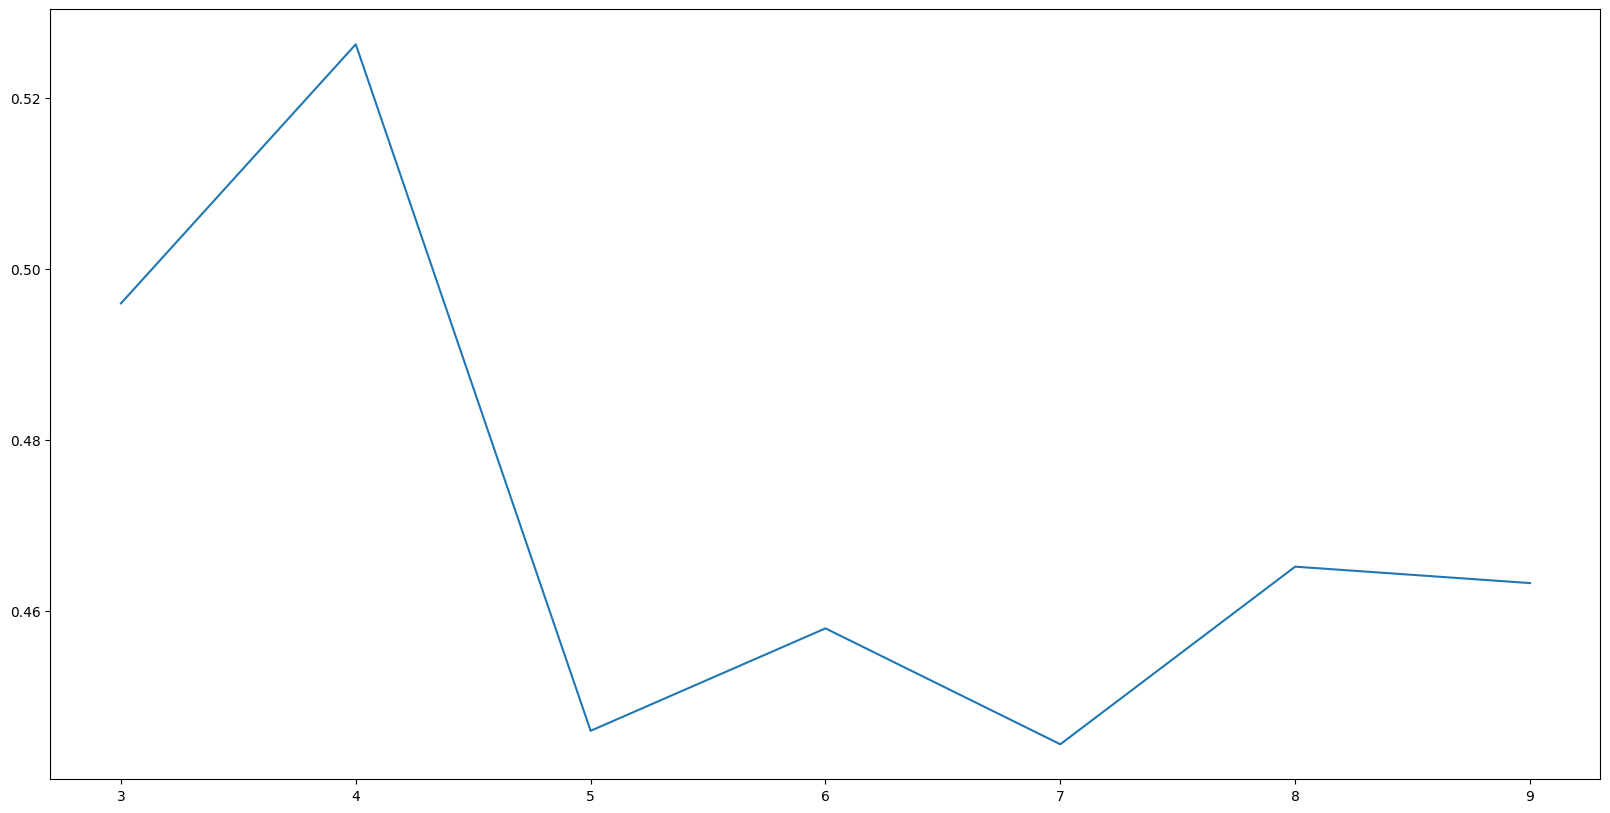

Running clustering with optimal group size of  4
[1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 2 2 2 1 1 1 3 3 3 1 2 2 1 2 2 0 0 0 2 2 2 0 0 0 0 0 0 1 1 1 2 2 2 0 0 0 0
 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 0 0 0 2 2 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 1 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 2 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 0 0 0 0 0 3 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 3 0 3 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 0 0 0 0 0 0 0 0 0 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 2 2 2 0 0 0 0 0 0 0 0 0 1 1 2 0 0 0 

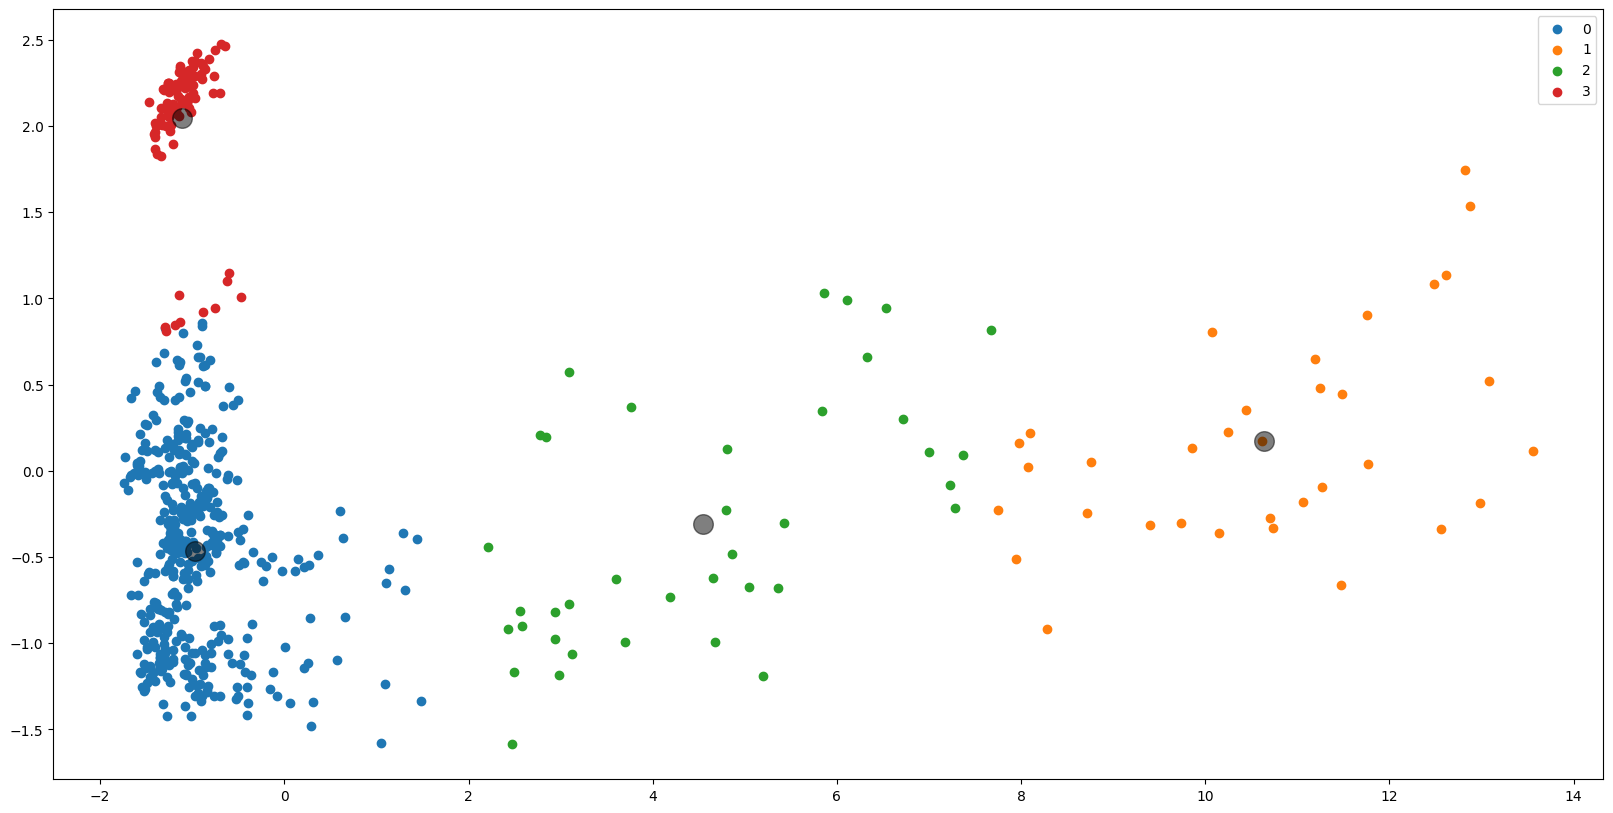

In [175]:
# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)
identifiers = np.arange(0,len(all_plot_data),1)
print("identifiers:",identifiers[-10:])

groups = image_cluster(all_plot_data,model)

In [77]:
from sklearn.metrics import silhouette_score

In [137]:
len(groups[3])

104

In [167]:
groups[0][23][0]

26

In [172]:
identifiers

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [180]:
for i in groups[0]:
    if i[0] == 604:
        print(i)

(604, (-1.2433511, -1.2262818))


In [90]:
all_cadences2 = []
for i in all_plot_data2:
    res = reformat(i)
    all_cadences2.append(res)


matplotlib.image WARNING  Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


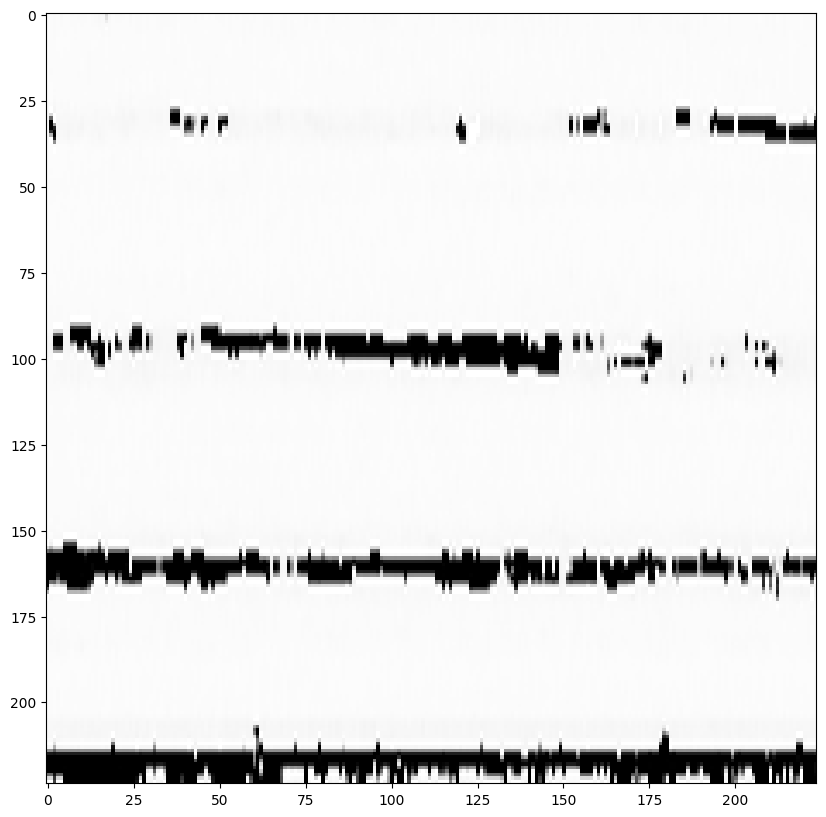

In [129]:
plt.imshow(all_cadences2[groups[0][2]])
plt.show()

In [ ]:
for i in groups[0][0:20]:
    plt.imshow(all_cadences2[i])
    plt.show()


In [174]:
def kmeans_cluster(x,num_labels,best):
    # use kmeans to cluster
    kmeans = KMeans(n_clusters=num_labels, random_state=22)
    kmeans.fit(x)

    # make the groups based on kmeans labels
    groups = {}
    
    y_kmeans = kmeans.predict(x)
    print(y_kmeans)
     
    #plotting the results:
     
    print(x)
    if best == True:
        fig, ax = plt.subplots()
        # ax = fig.add_subplot(projection='3d')


        # lineObjects = plt.scatter(x[:, 0], x[:, 1], c=y_kmeans, s=50, cmap='viridis')
        # group_numbers = y_kmeans.tolist()
        # group_numbers = tuple([str(i) for i in group_numbers])
        # print(group_numbers)
        # centers = kmeans.cluster_centers_
        # plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)
        
        # plt.legend(lineObjects, group_numbers)

        # plt.show()

        u_labels = np.unique(y_kmeans)
 
        #plotting the results:
         
        for i in u_labels:
            ax.scatter(x[y_kmeans == i , 0], x[y_kmeans == i , 1], label = i)
        centers = kmeans.cluster_centers_
        ax.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

        plt.legend()
        plt.show()


        
        # for g in np.unique(y_kmeans):
        #     ix = np.where(y_kmeans == g)
        #     scatter_x = x[:,0]
        #     scatter_y = x[:,1]

        #     ax.scatter(scatter_x[ix], scatter_y[ix], c = y_kmeans[ix], label = g, s = 100)

        # centers = kmeans.cluster_centers_
        # ax.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)
        # plt.cmap='viridis')
        # ax.legend()
        # plt.show()



        for file, cluster in zip(identifiers,kmeans.labels_):
            if cluster not in groups.keys():
                groups[cluster] = []
                groups[cluster].append((file,(x[file, 0], x[file, 1])))
            else:
                groups[cluster].append((file,(x[file, 0], x[file, 1])))
        return groups

    else:
        # see how well this number of groups did
        cluster_labels = kmeans.fit_predict(x)
        silhouette_avg = silhouette_score(x, cluster_labels)
        print(f"A group size of {num_labels} had a score of:",silhouette_avg)
    
        return silhouette_avg, num_labels
    


In [138]:
def image_cluster(all_plot_data,model):
    all_cadences = []
    for i in all_plot_data:
        res = reformat(i)
        all_cadences.append(res)
    print("creating model...")

    # store data in dictionary
    data = {}
    # label each cadence with a number

    print("extracting features...")
    for i in range(0,len(all_cadences)):
    # try to extract the features and update the dictionary
        cadence = all_cadences[i]
        name = identifiers[i]
        feat = extract_features(cadence,model)
        data[name] = feat

    
    filenames = np.array(list(data.keys()))
    feat = np.array(list(data.values()))
    feat = feat.reshape(-1,4096)
    
    # reduce number of features
    print('Reducing Features...')
    pca = PCA(n_components=3, random_state=22)
    pca.fit(feat)
    x = pca.transform(feat)


    

    print("Finding best group size...")

    # # with gap statistics
    # score_g, df = optimalK(x, nrefs=5, maxClusters=10)
    # plt.plot(df['clusterCount'], df['gap'], linestyle='--', marker='o', color='b');
    # plt.xlabel('K');
    # plt.ylabel('Gap Statistic');
    # plt.title('Gap Statistic vs. K');
    # plt.show()

    
    # find best with Kelbow
    # check_KElbow(x)

    # # david-boin
    # scores = []
    # centers = list(range(2,15))
    # for center in centers:
    #     scores.append(get_kmeans_score(x, center))
        
    # plt.plot(centers, scores, linestyle='--', marker='o', color='b');
    # plt.xlabel('K');
    # plt.ylabel('Davies Bouldin score');
    # plt.title('Davies Bouldin score vs. K');

    
    # find best group size with silhouette method
    best_label = 0
    best_silhouette = 0
    labels = []
    sils = []

    possible_values = np.arange(3,10,1)
    possible_values = [int(i) for i in possible_values]
    # print(possible_values)
    for i in possible_values:
        silhouette_avg, num_labels = kmeans_cluster(x,i,False)
        labels.append(num_labels)
        sils.append(silhouette_avg)
        if silhouette_avg > best_silhouette:
            best_silhouette = silhouette_avg
            best_label =i

    print("#Labels vs Sils")
    plt.plot(labels,sils)
    plt.show()

    # now that optimal group size was found, get groups from that:
    print("Running clustering with optimal group size of ", best_label)
    
    groups = kmeans_cluster(x,best_label,True)

    

    return groups
    
    

    

In [73]:
def extract_features(res, model):
# reformat data for preprocessor
    reshaped_img = res.reshape(1,224,224,3)
    x = preprocess_input(reshaped_img)
    features = model.predict(x, use_multiprocessing=True)
    return features


In [627]:
possible_values = np.arange(2,30,1)
possible_values = [int(i) for i in possible_values]
print(possible_values)

[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]
